##  <center> Predicción de Entalpia de Atomización <br>Andrea Reales && Jesus Ortiz </center>
<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="15%" height="15%" />
a) Construya un *dataframe* con los datos a analizar y descríbalo brevemete. Además, realice la división de éste en los conjuntos de entrenamiento, validación y testeo correspondientes. Comente por qué se deben eliminar ciertas columnas.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras import regularizers

Using TensorFlow backend.


In [2]:

#datos= pd.read_csv("C:/Users/jesus/Desktop/REDES NEURONALES/roboBohr.csv")
datos= pd.read_csv("C:/Users/Jesus/Documents/GitHub/roboBohr.csv")
datos.shape
datos.info()
datos.describe()
datos.drop(columns=['Unnamed: 0','pubchem_id'],axis=1,inplace=True)
total=len(datos)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16242 entries, 0 to 16241
Columns: 1278 entries, Unnamed: 0 to Eat
dtypes: float64(1276), int64(2)
memory usage: 158.4 MB


Es importante hacer un analisis previo de los datos cargados.

In [3]:
datos

,0,1,2,3,4,5,6,7,8,9,...,1266,1267,1268,1269,1270,1271,1272,1273,1274,Eat
0,73.516695,17.817765,12.469551,12.458130,12.454607,12.447345,12.433065,12.426926,12.387474,12.365984,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,-19.013763
1,73.516695,20.649126,18.527789,17.891535,17.887995,17.871731,17.852586,17.729842,15.864270,15.227643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-10.161019
2,73.516695,17.830377,12.512263,12.404775,12.394493,12.391564,12.324461,12.238106,10.423249,8.698826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.376619
3,73.516695,17.875810,17.871259,17.862402,17.850920,17.850440,12.558105,12.557645,12.517583,12.444141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.776438
4,73.516695,17.883818,17.868256,17.864221,17.818540,12.508657,12.490519,12.450098,10.597068,10.595914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.537140
5,53.358707,17.038820,16.981436,16.167446,16.137631,16.053239,15.713944,15.432893,15.421116,13.799676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-16.169604
6,53.358707,17.040919,16.975955,16.168874,16.131888,16.073074,15.843838,15.638061,15.160532,13.712149,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-17.378477
7,53.358707,15.190748,15.134397,15.078282,13.721467,13.720334,13.671396,13.655370,13.654554,13.654217,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-15.673737
8,73.516695,20.648642,18.559611,17.674347,16.152675,14.266867,13.666125,13.657868,13.642132,13.629813,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-10.427851
9,73.516695,17.563342,17.562598,12.653657,12.540799,12.539160,12.536825,12.508203,12.489843,11.941684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.744178


Tenemos un dataset de 16242 muestras cada una con 1276 columnas, en nuestro caso equivalen  a XXXXX cada una de ellas 

In [4]:
df_train=datos[:int(0.6*total)]                       #60% de los datos
df_val=datos[int(0.6*total):int(0.85*total)]          #25% de los datos
df_test=datos[int(0.85*total)::]                      #15% restante


In [5]:
tra1=len(df_train)
val1=len(df_val)
test1=len(df_test)
print('Total muestras entrenamiento: %d'%(tra1))
print('Total muestras entrenamiento: %d'%(val1))
print('Total muestras entrenamiento: %d'%(test1))


Total muestras entrenamiento: 9745
Total muestras entrenamiento: 4060
Total muestras entrenamiento: 2437


a.1) Una buena práctica es la de normalizar los datos antes de trabajar con el modelo. **Explique por qué se aconseja dicho preprocesamiento**

In [6]:

scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
X_val_scaled =  pd.DataFrame(scaler.transform(df_val),columns=df_val.columns)
X_test_scaled =  pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)
...
y_train = df_train.pop('Eat').values.reshape(-1,1)
y_val = df_val.pop('Eat').values.reshape(-1,1)
...
X_train_scaled.drop(columns=['Eat'],axis=1,inplace=True)
X_val_scaled.drop(columns=['Eat'],axis=1,inplace=True)
X_test_scaled.drop(columns=['Eat'],axis=1,inplace=True)

Toda dataset con mucha información requiere normalizar los datos ya que estos contienen caracteristicas que nos permiten ver como estan relacionados los datos y saber cuales son relevantes y cuales no, además si se tienen datos muy separados el error no se puede cuantificar y en el entrenamiento pueden ocurrir repeticiones e incoherencias con la información

b) Muestre en un gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de *epochs* de entrenamiento, para una red *feedforward* de 3 capas, con 256 unidades ocultas y función de activación sigmoidal. Entrene la red usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 250 epochs de entrenamiento, en el conjunto de entrenamiento y de validación. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.

In [17]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9088/9745 [==========================>...] - ETA: 0s - loss: 1.4779

KeyboardInterrupt: 

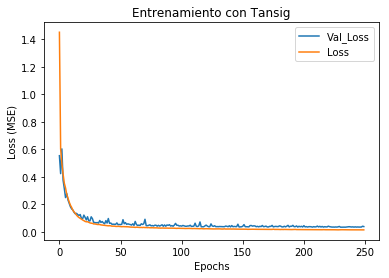

In [9]:

fig, im = plt.subplots()
im.plot(history.history['val_loss'])
im.plot(history.history['loss'])
im.set(xlabel='Epochs', ylabel='Loss (MSE)',title='Entrenamiento con Tansig')
im.legend(('Val_Loss', 'Loss' ))


c) Repita el paso anterior, utilizado ’**ReLU**’ como función de activación y compare con lo obtenido en b).

In [11]:

model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.001),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 207us/step - loss: 8.2687 - val_loss: 2.9805
Epoch 2/250
9745/9745 [==============================] - 2s 202us/step - loss: 2.0078 - val_loss: 1.7111
Epoch 3/250
9745/9745 [==============================] - 2s 198us/step - loss: 0.9595 - val_loss: 1.6027
Epoch 4/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.6473 - val_loss: 1.4014
Epoch 5/250
9745/9745 [==============================] - 2s 197us/step - loss: 0.6347 - val_loss: 1.3245
Epoch 6/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.5528 - val_loss: 2.0329
Epoch 7/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.4110 - val_loss: 1.2768
Epoch 8/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.3472 - val_loss: 0.9176
Epoch 9/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.3033 - val_loss: 0.9384
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 2s 175us/step - loss: 0.0487 - val_loss: 0.2702
Epoch 79/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.0546 - val_loss: 0.2675
Epoch 80/250
9745/9745 [==============================] - 2s 175us/step - loss: 0.0482 - val_loss: 0.2738
Epoch 81/250
9745/9745 [==============================] - 2s 174us/step - loss: 0.0473 - val_loss: 0.3287
Epoch 82/250
9745/9745 [==============================] - 2s 174us/step - loss: 0.0486 - val_loss: 0.4655
Epoch 83/250
9745/9745 [==============================] - 2s 174us/step - loss: 0.0469 - val_loss: 0.3045
Epoch 84/250
9745/9745 [==============================] - 2s 174us/step - loss: 0.0513 - val_loss: 0.2757
Epoch 85/250
9745/9745 [==============================] - 2s 175us/step - loss: 0.0465 - val_loss: 0.2867
Epoch 86/250
9745/9745 [==============================] - 2s 177us/step - loss: 0.0471 - val_loss: 0.2951
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.0286 - val_loss: 0.2674
Epoch 156/250
9745/9745 [==============================] - 2s 190us/step - loss: 0.0278 - val_loss: 0.2784
Epoch 157/250
9745/9745 [==============================] - 2s 193us/step - loss: 0.0286 - val_loss: 0.2626
Epoch 158/250
9745/9745 [==============================] - 2s 186us/step - loss: 0.0290 - val_loss: 0.2816
Epoch 159/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.0277 - val_loss: 0.2586
Epoch 160/250
9745/9745 [==============================] - 2s 202us/step - loss: 0.0274 - val_loss: 0.2609
Epoch 161/250
9745/9745 [==============================] - 2s 200us/step - loss: 0.0274 - val_loss: 0.2576
Epoch 162/250
9745/9745 [==============================] - 2s 195us/step - loss: 0.0301 - val_loss: 0.2847
Epoch 163/250
9745/9745 [==============================] - 2s 198us/step - loss: 0.0293 - val_loss: 0.2562
Epoch 164/250
9745/9745 [============

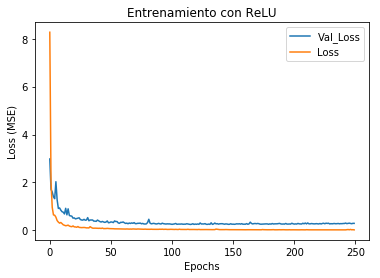

In [12]:
fig, im = plt.subplots()
im.plot(history.history['val_loss'])
im.plot(history.history['loss'])
im.set(xlabel='Epochs', ylabel='Loss (MSE)',title='Entrenamiento con ReLU')
im.legend(('Val_Loss', 'Loss' ))


##OJO con la LEARNING RATE
Tuvimos que disminuirla en factor de diez por que con un learning rate de 0.01 era tan alto el error que obteniamos puros NAN

d) Repita b) y c) variando la tasa de aprendizaje (*learning rate*) en un rango sensible. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.

In [13]:

n_lr = 20
lear_rate = np.linspace(0,1,n_lr)
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.1),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 204us/step - loss: nan - val_loss: nan
Epoch 2/250
9745/9745 [==============================] - 2s 178us/step - loss: nan - val_loss: nan
Epoch 3/250
9745/9745 [==============================] - 2s 180us/step - loss: nan - val_loss: nan
Epoch 4/250
9745/9745 [==============================] - 2s 180us/step - loss: nan - val_loss: nan
Epoch 5/250
9745/9745 [==============================] - 2s 180us/step - loss: nan - val_loss: nan
Epoch 6/250
9745/9745 [==============================] - 2s 180us/step - loss: nan - val_loss: nan
Epoch 7/250
9745/9745 [==============================] - 2s 178us/step - loss: nan - val_loss: nan
Epoch 8/250
9745/9745 [==============================] - 2s 180us/step - loss: nan - val_loss: nan
Epoch 9/250
9745/9745 [==============================] - 2s 180us/step - loss: nan - val_loss: nan
Epoch 10/250
9745/9745 [==============================] - 2s 

9745/9745 [==============================] - 2s 178us/step - loss: nan - val_loss: nan
Epoch 164/250
9745/9745 [==============================] - 2s 175us/step - loss: nan - val_loss: nan
Epoch 165/250
9745/9745 [==============================] - 2s 178us/step - loss: nan - val_loss: nan
Epoch 166/250
9745/9745 [==============================] - 2s 176us/step - loss: nan - val_loss: nan
Epoch 167/250
9745/9745 [==============================] - 2s 176us/step - loss: nan - val_loss: nan
Epoch 168/250
9745/9745 [==============================] - 2s 176us/step - loss: nan - val_loss: nan
Epoch 169/250
9745/9745 [==============================] - 2s 176us/step - loss: nan - val_loss: nan
Epoch 170/250
9745/9745 [==============================] - 2s 176us/step - loss: nan - val_loss: nan
Epoch 171/250
9745/9745 [==============================] - 2s 176us/step - loss: nan - val_loss: nan
Epoch 172/250
9745/9745 [==============================] - 2s 176us/step - loss: nan - val_loss: nan
Epoc

en este caso aumentamos la learn_rate y el algoritmo no converge.


In [14]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=1),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val));


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 242us/step - loss: nan - val_loss: nan
Epoch 2/250
9745/9745 [==============================] - 2s 186us/step - loss: nan - val_loss: nan
Epoch 3/250
9745/9745 [==============================] - 2s 207us/step - loss: nan - val_loss: nan
Epoch 4/250
9745/9745 [==============================] - 2s 183us/step - loss: nan - val_loss: nan
Epoch 5/250
9745/9745 [==============================] - 2s 175us/step - loss: nan - val_loss: nan
Epoch 6/250
9745/9745 [==============================] - 2s 175us/step - loss: nan - val_loss: nan
Epoch 7/250
9745/9745 [==============================] - 2s 175us/step - loss: nan - val_loss: nan
Epoch 8/250
9745/9745 [==============================] - 2s 175us/step - loss: nan - val_loss: nan
Epoch 9/250
9745/9745 [==============================] - 2s 175us/step - loss: nan - val_loss: nan
Epoch 10/250
9745/9745 [==============================] - 2s 

9745/9745 [==============================] - 2s 184us/step - loss: nan - val_loss: nan
Epoch 164/250
9745/9745 [==============================] - 2s 183us/step - loss: nan - val_loss: nan
Epoch 165/250
9745/9745 [==============================] - 2s 183us/step - loss: nan - val_loss: nan
Epoch 166/250
9745/9745 [==============================] - 2s 184us/step - loss: nan - val_loss: nan
Epoch 167/250
9745/9745 [==============================] - 2s 184us/step - loss: nan - val_loss: nan
Epoch 168/250
9745/9745 [==============================] - 2s 184us/step - loss: nan - val_loss: nan
Epoch 169/250
9745/9745 [==============================] - 2s 184us/step - loss: nan - val_loss: nan
Epoch 170/250
9745/9745 [==============================] - 2s 184us/step - loss: nan - val_loss: nan
Epoch 171/250
9745/9745 [==============================] - 2s 183us/step - loss: nan - val_loss: nan
Epoch 172/250
9745/9745 [==============================] - 2s 184us/step - loss: nan - val_loss: nan
Epoc

Aumentamos mas el LR y sigue sin converger


In [15]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.09),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 220us/step - loss: nan - val_loss: nan
Epoch 2/250
9745/9745 [==============================] - 2s 192us/step - loss: nan - val_loss: nan
Epoch 3/250
9745/9745 [==============================] - 2s 235us/step - loss: nan - val_loss: nan
Epoch 4/250
9745/9745 [==============================] - 2s 248us/step - loss: nan - val_loss: nan
Epoch 5/250
9745/9745 [==============================] - 2s 228us/step - loss: nan - val_loss: nan
Epoch 6/250
9745/9745 [==============================] - 2s 222us/step - loss: nan - val_loss: nan
Epoch 7/250
9745/9745 [==============================] - 3s 257us/step - loss: nan - val_loss: nan
Epoch 8/250
9745/9745 [==============================] - 2s 217us/step - loss: nan - val_loss: nan
Epoch 9/250
9745/9745 [==============================] - 2s 253us/step - loss: nan - val_loss: nan
Epoch 10/250
9745/9745 [==============================] - 2s 

9745/9745 [==============================] - 2s 181us/step - loss: nan - val_loss: nan
Epoch 164/250
9745/9745 [==============================] - 2s 180us/step - loss: nan - val_loss: nan
Epoch 165/250
9745/9745 [==============================] - 2s 183us/step - loss: nan - val_loss: nan
Epoch 166/250
9745/9745 [==============================] - 2s 184us/step - loss: nan - val_loss: nan
Epoch 167/250
9745/9745 [==============================] - 2s 188us/step - loss: nan - val_loss: nan
Epoch 168/250
9745/9745 [==============================] - 2s 184us/step - loss: nan - val_loss: nan
Epoch 169/250
9745/9745 [==============================] - 2s 184us/step - loss: nan - val_loss: nan
Epoch 170/250
9745/9745 [==============================] - 2s 188us/step - loss: nan - val_loss: nan
Epoch 171/250
9745/9745 [==============================] - 2s 184us/step - loss: nan - val_loss: nan
Epoch 172/250
9745/9745 [==============================] - 2s 183us/step - loss: nan - val_loss: nan
Epoc

In [16]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.05),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 230us/step - loss: nan - val_loss: nan
Epoch 2/250
9745/9745 [==============================] - 2s 198us/step - loss: nan - val_loss: nan
Epoch 3/250
9745/9745 [==============================] - 2s 204us/step - loss: nan - val_loss: nan
Epoch 4/250
9745/9745 [==============================] - 2s 201us/step - loss: nan - val_loss: nan
Epoch 5/250
9745/9745 [==============================] - 2s 195us/step - loss: nan - val_loss: nan
Epoch 6/250
9745/9745 [==============================] - 2s 195us/step - loss: nan - val_loss: nan
Epoch 7/250
9745/9745 [==============================] - 2s 196us/step - loss: nan - val_loss: nan
Epoch 8/250
9745/9745 [==============================] - 2s 196us/step - loss: nan - val_loss: nan
Epoch 9/250
9745/9745 [==============================] - 2s 195us/step - loss: nan - val_loss: nan
Epoch 10/250
9745/9745 [==============================] - 2s 

9745/9745 [==============================] - 2s 208us/step - loss: nan - val_loss: nan
Epoch 164/250
9745/9745 [==============================] - 2s 207us/step - loss: nan - val_loss: nan
Epoch 165/250
9745/9745 [==============================] - 2s 193us/step - loss: nan - val_loss: nan
Epoch 166/250
9745/9745 [==============================] - 2s 191us/step - loss: nan - val_loss: nan
Epoch 167/250
9745/9745 [==============================] - 2s 190us/step - loss: nan - val_loss: nan
Epoch 168/250
9745/9745 [==============================] - 2s 192us/step - loss: nan - val_loss: nan
Epoch 169/250
9745/9745 [==============================] - 2s 193us/step - loss: nan - val_loss: nan
Epoch 170/250
9745/9745 [==============================] - 2s 192us/step - loss: nan - val_loss: nan
Epoch 171/250
9745/9745 [==============================] - 2s 192us/step - loss: nan - val_loss: nan
Epoch 172/250
9745/9745 [==============================] - 2s 193us/step - loss: nan - val_loss: nan
Epoc

In [14]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.02),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 214us/step - loss: 6.8202 - val_loss: 2.3205
Epoch 2/250
9745/9745 [==============================] - 2s 198us/step - loss: 0.4548 - val_loss: 0.2701
Epoch 3/250
9745/9745 [==============================] - 2s 205us/step - loss: 0.3061 - val_loss: 0.5303
Epoch 4/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.2491 - val_loss: 0.3925
Epoch 5/250
9745/9745 [==============================] - 2s 198us/step - loss: 0.2195 - val_loss: 0.1536
Epoch 6/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.1610 - val_loss: 0.1788
Epoch 7/250
9745/9745 [==============================] - 2s 184us/step - loss: 0.1580 - val_loss: 0.7088
Epoch 8/250
9745/9745 [==============================] - 2s 186us/step - loss: 0.1643 - val_loss: 0.1420
Epoch 9/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.1173 - val_loss: 0.1252
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 3s 284us/step - loss: 0.0268 - val_loss: 0.0441
Epoch 79/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.0242 - val_loss: 0.0476
Epoch 80/250
9745/9745 [==============================] - 2s 191us/step - loss: 0.0290 - val_loss: 0.1147
Epoch 81/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.0257 - val_loss: 0.0512
Epoch 82/250
9745/9745 [==============================] - 2s 201us/step - loss: 0.0267 - val_loss: 0.0464
Epoch 83/250
9745/9745 [==============================] - 2s 214us/step - loss: 0.0273 - val_loss: 0.0837
Epoch 84/250
9745/9745 [==============================] - 2s 202us/step - loss: 0.0260 - val_loss: 0.0445
Epoch 85/250
9745/9745 [==============================] - 3s 276us/step - loss: 0.0341 - val_loss: 0.1091
Epoch 86/250
9745/9745 [==============================] - 2s 227us/step - loss: 0.0251 - val_loss: 0.0481
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 2s 188us/step - loss: 0.0202 - val_loss: 0.0429
Epoch 156/250
9745/9745 [==============================] - 2s 196us/step - loss: 0.0184 - val_loss: 0.0429
Epoch 157/250
9745/9745 [==============================] - 2s 187us/step - loss: 0.0183 - val_loss: 0.0995
Epoch 158/250
9745/9745 [==============================] - 2s 184us/step - loss: 0.0195 - val_loss: 0.0403
Epoch 159/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.0185 - val_loss: 0.0423
Epoch 160/250
9745/9745 [==============================] - 2s 184us/step - loss: 0.0182 - val_loss: 0.1088
Epoch 161/250
9745/9745 [==============================] - 2s 186us/step - loss: 0.0177 - val_loss: 0.0374
Epoch 162/250
9745/9745 [==============================] - 2s 184us/step - loss: 0.0182 - val_loss: 0.0425
Epoch 163/250
9745/9745 [==============================] - 2s 184us/step - loss: 0.0170 - val_loss: 0.0474
Epoch 164/250
9745/9745 [============

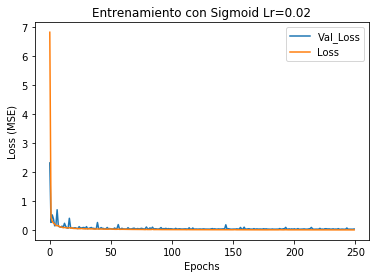

In [15]:
fig, im = plt.subplots()
im.plot(history.history['val_loss'])
im.plot(history.history['loss'])
im.set(xlabel='Epochs', ylabel='Loss (MSE)',title='Entrenamiento con Sigmoid Lr=0.02')
im.legend(('Val_Loss', 'Loss' ))

In [16]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.005),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val));

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 224us/step - loss: nan - val_loss: nan
Epoch 2/250
9745/9745 [==============================] - 2s 202us/step - loss: nan - val_loss: nan
Epoch 3/250
9745/9745 [==============================] - 2s 210us/step - loss: nan - val_loss: nan
Epoch 4/250
9745/9745 [==============================] - 2s 205us/step - loss: nan - val_loss: nan
Epoch 5/250
9745/9745 [==============================] - 2s 196us/step - loss: nan - val_loss: nan
Epoch 6/250
9745/9745 [==============================] - 2s 208us/step - loss: nan - val_loss: nan
Epoch 7/250
9745/9745 [==============================] - 2s 190us/step - loss: nan - val_loss: nan
Epoch 8/250
9745/9745 [==============================] - 2s 192us/step - loss: nan - val_loss: nan
Epoch 9/250
9745/9745 [==============================] - 3s 319us/step - loss: nan - val_loss: nan
Epoch 10/250
9745/9745 [==============================] - 3s 

9745/9745 [==============================] - 3s 315us/step - loss: nan - val_loss: nan
Epoch 164/250
9745/9745 [==============================] - 3s 318us/step - loss: nan - val_loss: nan
Epoch 165/250
9745/9745 [==============================] - 3s 319us/step - loss: nan - val_loss: nan
Epoch 166/250
9745/9745 [==============================] - 3s 323us/step - loss: nan - val_loss: nan
Epoch 167/250
9745/9745 [==============================] - 3s 316us/step - loss: nan - val_loss: nan
Epoch 168/250
9745/9745 [==============================] - 3s 320us/step - loss: nan - val_loss: nan
Epoch 169/250
9745/9745 [==============================] - 3s 320us/step - loss: nan - val_loss: nan
Epoch 170/250
9745/9745 [==============================] - 3s 319us/step - loss: nan - val_loss: nan
Epoch 171/250
9745/9745 [==============================] - 3s 312us/step - loss: nan - val_loss: nan
Epoch 172/250
9745/9745 [==============================] - 3s 322us/step - loss: nan - val_loss: nan
Epoc

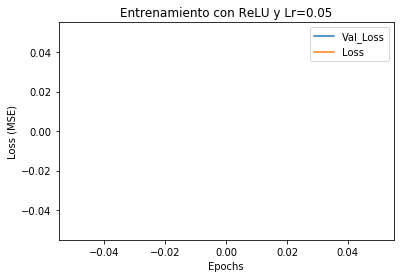

In [17]:
fig, im = plt.subplots()
im.plot(history.history['val_loss'])
im.plot(history.history['loss'])
im.set(xlabel='Epochs', ylabel='Loss (MSE)',title='Entrenamiento con ReLU y Lr=0.05')
im.legend(('Val_Loss', 'Loss' ))

In [21]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.003),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s 325us/step - loss: nan - val_loss: nan
Epoch 2/250
9745/9745 [==============================] - 2s 242us/step - loss: nan - val_loss: nan
Epoch 3/250
9745/9745 [==============================] - 2s 239us/step - loss: nan - val_loss: nan
Epoch 4/250
9745/9745 [==============================] - 2s 233us/step - loss: nan - val_loss: nan
Epoch 5/250
9745/9745 [==============================] - 2s 207us/step - loss: nan - val_loss: nan
Epoch 6/250
9745/9745 [==============================] - 2s 222us/step - loss: nan - val_loss: nan
Epoch 7/250
9745/9745 [==============================] - 2s 246us/step - loss: nan - val_loss: nan
Epoch 8/250
9745/9745 [==============================] - 2s 243us/step - loss: nan - val_loss: nan
Epoch 9/250
9745/9745 [==============================] - 2s 232us/step - loss: nan - val_loss: nan
Epoch 10/250
9745/9745 [==============================] - 2s 

9745/9745 [==============================] - 2s 240us/step - loss: nan - val_loss: nan
Epoch 164/250
9745/9745 [==============================] - 3s 265us/step - loss: nan - val_loss: nan
Epoch 165/250
9745/9745 [==============================] - 2s 236us/step - loss: nan - val_loss: nan
Epoch 166/250
9745/9745 [==============================] - 2s 247us/step - loss: nan - val_loss: nan
Epoch 167/250
9745/9745 [==============================] - 3s 257us/step - loss: nan - val_loss: nan
Epoch 168/250
9745/9745 [==============================] - 2s 235us/step - loss: nan - val_loss: nan
Epoch 169/250
9745/9745 [==============================] - 2s 196us/step - loss: nan - val_loss: nan
Epoch 170/250
9745/9745 [==============================] - 2s 195us/step - loss: nan - val_loss: nan
Epoch 171/250
9745/9745 [==============================] - 2s 195us/step - loss: nan - val_loss: nan
Epoch 172/250
9745/9745 [==============================] - 2s 202us/step - loss: nan - val_loss: nan
Epoc

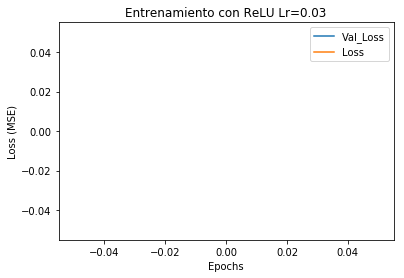

In [19]:
fig, im = plt.subplots()
im.plot(history.history['val_loss'])
im.plot(history.history['loss'])
im.set(xlabel='Epochs', ylabel='Loss (MSE)',title='Entrenamiento con ReLU Lr=0.03')
im.legend(('Val_Loss', 'Loss' ))

In [20]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.002),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 207us/step - loss: 9.9870 - val_loss: 9.0922
Epoch 2/250
9745/9745 [==============================] - 2s 179us/step - loss: 3.8526 - val_loss: 3.7889
Epoch 3/250
9745/9745 [==============================] - 2s 180us/step - loss: 2.4372 - val_loss: 2.6962
Epoch 4/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.8646 - val_loss: 0.9132
Epoch 5/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.7583 - val_loss: 3.5121
Epoch 6/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.5957 - val_loss: 0.8971
Epoch 7/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.9082 - val_loss: 1.2090
Epoch 8/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.4027 - val_loss: 0.6192
Epoch 9/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.3239 - val_loss: 0.5774
Epoch 1

Epoch 154/250
9745/9745 [==============================] - 2s 171us/step - loss: 0.0341 - val_loss: 0.4034
Epoch 155/250
9745/9745 [==============================] - 2s 173us/step - loss: 0.0336 - val_loss: 0.2916
Epoch 156/250
9745/9745 [==============================] - 2s 172us/step - loss: 0.0345 - val_loss: 0.2599
Epoch 157/250
9745/9745 [==============================] - 2s 171us/step - loss: 0.0407 - val_loss: 0.2462
Epoch 158/250
9745/9745 [==============================] - 2s 170us/step - loss: 0.0362 - val_loss: 0.3228
Epoch 159/250
9745/9745 [==============================] - 2s 172us/step - loss: 0.0371 - val_loss: 0.2659
Epoch 160/250
9745/9745 [==============================] - 2s 171us/step - loss: 0.0366 - val_loss: 0.2696
Epoch 161/250
9745/9745 [==============================] - 2s 172us/step - loss: 0.0437 - val_loss: 0.2652
Epoch 162/250
9745/9745 [==============================] - 2s 169us/step - loss: 0.0321 - val_loss: 0.2590
Epoch 163/250
9745/9745 [============

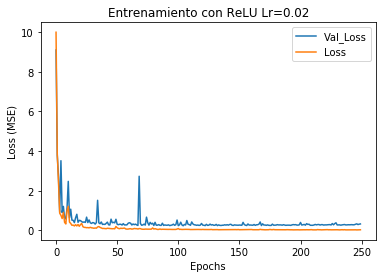

In [21]:
fig, im = plt.subplots()
im.plot(history.history['val_loss'])
im.plot(history.history['loss'])
im.set(xlabel='Epochs', ylabel='Loss (MSE)',title='Entrenamiento con ReLU Lr=0.02')
im.legend(('Val_Loss', 'Loss' ))

e) Entrene los modelos considerados en b) y c) usando *progressive decay*. Compare y comente.

In [24]:
n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)
sgd = SGD(lr=0.2, decay=1e-6)
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s 282us/step - loss: 1.5455 - val_loss: 0.5402
Epoch 2/250
9745/9745 [==============================] - 2s 206us/step - loss: 0.5970 - val_loss: 0.5171
Epoch 3/250
9745/9745 [==============================] - 2s 203us/step - loss: 0.5115 - val_loss: 0.4245
Epoch 4/250
9745/9745 [==============================] - 2s 213us/step - loss: 0.4323 - val_loss: 0.3179
Epoch 5/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.3821 - val_loss: 0.2891
Epoch 6/250
9745/9745 [==============================] - 2s 206us/step - loss: 0.3275 - val_loss: 0.2630
Epoch 7/250
9745/9745 [==============================] - 2s 201us/step - loss: 0.2864 - val_loss: 0.3928
Epoch 8/250
9745/9745 [==============================] - 2s 197us/step - loss: 0.2590 - val_loss: 0.2222
Epoch 9/250
9745/9745 [==============================] - 2s 191us/step - loss: 0.2275 - val_loss: 0.2091
Epoch 1

9745/9745 [==============================] - 2s 187us/step - loss: 0.0201 - val_loss: 0.0441
Epoch 154/250
9745/9745 [==============================] - 2s 186us/step - loss: 0.0205 - val_loss: 0.0451
Epoch 155/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.0199 - val_loss: 0.0448
Epoch 156/250
9745/9745 [==============================] - 2s 188us/step - loss: 0.0203 - val_loss: 0.0489
Epoch 157/250
9745/9745 [==============================] - 2s 188us/step - loss: 0.0200 - val_loss: 0.0427
Epoch 158/250
9745/9745 [==============================] - 2s 191us/step - loss: 0.0196 - val_loss: 0.0418
Epoch 159/250
9745/9745 [==============================] - 2s 190us/step - loss: 0.0203 - val_loss: 0.0398
Epoch 160/250
9745/9745 [==============================] - 2s 188us/step - loss: 0.0202 - val_loss: 0.0415
Epoch 161/250
9745/9745 [==============================] - 2s 184us/step - loss: 0.0197 - val_loss: 0.0391
Epoch 162/250
9745/9745 [==========================

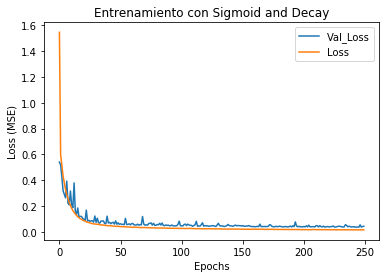

In [25]:
fig, im = plt.subplots()
im.plot(history.history['val_loss'])
im.plot(history.history['loss'])
im.set(xlabel='Epochs', ylabel='Loss (MSE)',title='Entrenamiento con Sigmoid and Decay')
im.legend(('Val_Loss', 'Loss' )) 

In [26]:
n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)
sgd = SGD(lr=0.2, decay=1e-6)
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.001),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 221us/step - loss: 8.6099 - val_loss: 2.8148
Epoch 2/250
9745/9745 [==============================] - 2s 203us/step - loss: 1.4197 - val_loss: 3.6697
Epoch 3/250
9745/9745 [==============================] - 2s 224us/step - loss: 0.9554 - val_loss: 1.7309
Epoch 4/250
9745/9745 [==============================] - 2s 203us/step - loss: 0.6741 - val_loss: 1.6318
Epoch 5/250
9745/9745 [==============================] - 2s 193us/step - loss: 0.5668 - val_loss: 1.3138
Epoch 6/250
9745/9745 [==============================] - 2s 191us/step - loss: 0.5110 - val_loss: 1.3167
Epoch 7/250
9745/9745 [==============================] - 2s 192us/step - loss: 0.5312 - val_loss: 1.2140
Epoch 8/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.3767 - val_loss: 1.0507
Epoch 9/250
9745/9745 [==============================] - 2s 207us/step - loss: 0.3044 - val_loss: 0.9711
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 2s 187us/step - loss: 0.0485 - val_loss: 0.4194
Epoch 79/250
9745/9745 [==============================] - 2s 192us/step - loss: 0.0593 - val_loss: 0.4402
Epoch 80/250
9745/9745 [==============================] - 2s 214us/step - loss: 0.0537 - val_loss: 0.4277
Epoch 81/250
9745/9745 [==============================] - 2s 190us/step - loss: 0.0484 - val_loss: 0.4798
Epoch 82/250
9745/9745 [==============================] - 2s 186us/step - loss: 0.0473 - val_loss: 0.4182
Epoch 83/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.0455 - val_loss: 0.4216
Epoch 84/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0454 - val_loss: 0.4692
Epoch 85/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0484 - val_loss: 0.4268
Epoch 86/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.0469 - val_loss: 0.4329
Epoch 87/250
9745/9745 [======================

9745/9745 [==============================] - 2s 180us/step - loss: 0.0214 - val_loss: 0.4736
Epoch 231/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.0230 - val_loss: 0.4887
Epoch 232/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.0227 - val_loss: 0.5132
Epoch 233/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.0234 - val_loss: 0.5021
Epoch 234/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.0225 - val_loss: 0.4832
Epoch 235/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.0222 - val_loss: 0.5129
Epoch 236/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.0224 - val_loss: 0.4958
Epoch 237/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.0218 - val_loss: 0.5151
Epoch 238/250
9745/9745 [==============================] - 2s 188us/step - loss: 0.0219 - val_loss: 0.4915
Epoch 239/250
9745/9745 [==========================

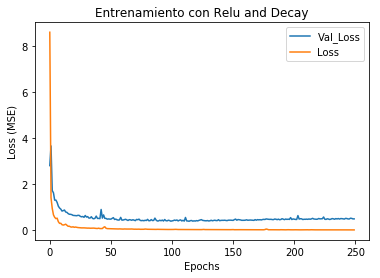

In [27]:
fig, im = plt.subplots()
im.plot(history.history['val_loss'])
im.plot(history.history['loss'])
im.set(xlabel='Epochs', ylabel='Loss (MSE)',title='Entrenamiento con Relu and Decay')
im.legend(('Val_Loss', 'Loss' )) 

f) Entrene los modelos considerados en b) y c) utilizando SGD en mini-*batches*. Experimente con diferentes tamaños del *batch*. Comente.

In [29]:
n_batches = 21
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))
model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.001),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 157us/step - loss: 0.0188 - val_loss: 0.5019
Epoch 2/250
9745/9745 [==============================] - 1s 152us/step - loss: 0.0182 - val_loss: 0.5170
Epoch 3/250
9745/9745 [==============================] - 1s 152us/step - loss: 0.0184 - val_loss: 0.5011
Epoch 4/250
9745/9745 [==============================] - 1s 153us/step - loss: 0.0185 - val_loss: 0.5025
Epoch 5/250
9745/9745 [==============================] - 2s 154us/step - loss: 0.0183 - val_loss: 0.5076
Epoch 6/250
9745/9745 [==============================] - 2s 163us/step - loss: 0.0184 - val_loss: 0.5084
Epoch 7/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.0180 - val_loss: 0.5084
Epoch 8/250
9745/9745 [==============================] - 2s 171us/step - loss: 0.0189 - val_loss: 0.5033
Epoch 9/250
9745/9745 [==============================] - 1s 152us/step - loss: 0.0181 - val_loss: 0.5157
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 1s 150us/step - loss: 0.0161 - val_loss: 0.5217
Epoch 79/250
9745/9745 [==============================] - 1s 141us/step - loss: 0.0167 - val_loss: 0.5316
Epoch 80/250
9745/9745 [==============================] - 1s 140us/step - loss: 0.0160 - val_loss: 0.5319
Epoch 81/250
9745/9745 [==============================] - 1s 140us/step - loss: 0.0169 - val_loss: 0.5158
Epoch 82/250
9745/9745 [==============================] - 1s 142us/step - loss: 0.0166 - val_loss: 0.5372
Epoch 83/250
9745/9745 [==============================] - 1s 147us/step - loss: 0.0163 - val_loss: 0.5213
Epoch 84/250
9745/9745 [==============================] - 1s 150us/step - loss: 0.0160 - val_loss: 0.5453
Epoch 85/250
9745/9745 [==============================] - 1s 143us/step - loss: 0.0168 - val_loss: 0.5358
Epoch 86/250
9745/9745 [==============================] - 1s 148us/step - loss: 0.0165 - val_loss: 0.5477
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 1s 145us/step - loss: 0.0145 - val_loss: 0.5681
Epoch 156/250
9745/9745 [==============================] - 1s 146us/step - loss: 0.0152 - val_loss: 0.5543
Epoch 157/250
9745/9745 [==============================] - 1s 152us/step - loss: 0.0149 - val_loss: 0.5696
Epoch 158/250
9745/9745 [==============================] - 1s 140us/step - loss: 0.0146 - val_loss: 0.5588
Epoch 159/250
9745/9745 [==============================] - 1s 138us/step - loss: 0.0152 - val_loss: 0.5647
Epoch 160/250
9745/9745 [==============================] - 1s 142us/step - loss: 0.0152 - val_loss: 0.5573
Epoch 161/250
9745/9745 [==============================] - 1s 145us/step - loss: 0.0150 - val_loss: 0.5536
Epoch 162/250
9745/9745 [==============================] - 1s 153us/step - loss: 0.0148 - val_loss: 0.5545
Epoch 163/250
9745/9745 [==============================] - 1s 145us/step - loss: 0.0151 - val_loss: 0.5536
Epoch 164/250
9745/9745 [============

Epoch 58/250
9745/9745 [==============================] - 2s 196us/step - loss: 0.0672 - val_loss: 0.2017
Epoch 59/250
9745/9745 [==============================] - 2s 201us/step - loss: 0.0674 - val_loss: 0.2088
Epoch 60/250
9745/9745 [==============================] - 2s 200us/step - loss: 0.0639 - val_loss: 0.2006
Epoch 61/250
9745/9745 [==============================] - 2s 195us/step - loss: 0.0630 - val_loss: 0.1972
Epoch 62/250
9745/9745 [==============================] - 2s 195us/step - loss: 0.0615 - val_loss: 0.1905
Epoch 63/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.0616 - val_loss: 0.1922
Epoch 64/250
9745/9745 [==============================] - 2s 199us/step - loss: 0.0606 - val_loss: 0.1890
Epoch 65/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.0580 - val_loss: 0.1818
Epoch 66/250
9745/9745 [==============================] - 2s 194us/step - loss: 0.0605 - val_loss: 0.2298
Epoch 67/250
9745/9745 [======================

Epoch 135/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.0349 - val_loss: 0.1521
Epoch 136/250
9745/9745 [==============================] - 2s 175us/step - loss: 0.0367 - val_loss: 0.1318
Epoch 137/250
9745/9745 [==============================] - 2s 175us/step - loss: 0.0330 - val_loss: 0.1475
Epoch 138/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.0335 - val_loss: 0.1463
Epoch 139/250
9745/9745 [==============================] - 2s 175us/step - loss: 0.0350 - val_loss: 0.1475
Epoch 140/250
9745/9745 [==============================] - 2s 175us/step - loss: 0.0344 - val_loss: 0.1372
Epoch 141/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.0331 - val_loss: 0.1739
Epoch 142/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.0311 - val_loss: 0.1383
Epoch 143/250
9745/9745 [==============================] - 2s 192us/step - loss: 0.0316 - val_loss: 0.1373
Epoch 144/250
9745/9745 [============

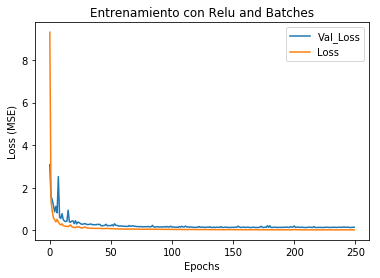

In [30]:
fig, im = plt.subplots()
im.plot(history.history['val_loss'])
im.plot(history.history['loss'])
im.set(xlabel='Epochs', ylabel='Loss (MSE)',title='Entrenamiento con Relu and Mini Batch=21')
im.legend(('Val_Loss', 'Loss' )) 

In [31]:
n_batches = 10
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))
model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.001),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.0191 - val_loss: 0.1456
Epoch 2/250
9745/9745 [==============================] - 2s 203us/step - loss: 0.0190 - val_loss: 0.1425
Epoch 3/250
9745/9745 [==============================] - 2s 217us/step - loss: 0.0191 - val_loss: 0.1373
Epoch 4/250
9745/9745 [==============================] - 2s 239us/step - loss: 0.0194 - val_loss: 0.1386
Epoch 5/250
9745/9745 [==============================] - 2s 238us/step - loss: 0.0185 - val_loss: 0.1422
Epoch 6/250
9745/9745 [==============================] - 2s 248us/step - loss: 0.0203 - val_loss: 0.1460
Epoch 7/250
9745/9745 [==============================] - 2s 220us/step - loss: 0.0191 - val_loss: 0.1383
Epoch 8/250
9745/9745 [==============================] - 2s 236us/step - loss: 0.0186 - val_loss: 0.1381
Epoch 9/250
9745/9745 [==============================] - 2s 245us/step - loss: 0.0191 - val_loss: 0.1374
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 2s 162us/step - loss: 0.0171 - val_loss: 0.1405
Epoch 79/250
9745/9745 [==============================] - 2s 166us/step - loss: 0.0164 - val_loss: 0.1389
Epoch 80/250
9745/9745 [==============================] - 2s 165us/step - loss: 0.0169 - val_loss: 0.1453
Epoch 81/250
9745/9745 [==============================] - 2s 158us/step - loss: 0.0166 - val_loss: 0.1411
Epoch 82/250
9745/9745 [==============================] - 2s 160us/step - loss: 0.0172 - val_loss: 0.1397
Epoch 83/250
9745/9745 [==============================] - 2s 155us/step - loss: 0.0168 - val_loss: 0.1391
Epoch 84/250
9745/9745 [==============================] - 2s 155us/step - loss: 0.0167 - val_loss: 0.1464
Epoch 85/250
9745/9745 [==============================] - 2s 161us/step - loss: 0.0166 - val_loss: 0.1461
Epoch 86/250
9745/9745 [==============================] - 2s 163us/step - loss: 0.0166 - val_loss: 0.1418
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 2s 184us/step - loss: 0.0159 - val_loss: 0.1478
Epoch 156/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0155 - val_loss: 0.1456
Epoch 157/250
9745/9745 [==============================] - 2s 163us/step - loss: 0.0154 - val_loss: 0.1456
Epoch 158/250
9745/9745 [==============================] - 2s 162us/step - loss: 0.0146 - val_loss: 0.1452
Epoch 159/250
9745/9745 [==============================] - 2s 165us/step - loss: 0.0147 - val_loss: 0.1457
Epoch 160/250
9745/9745 [==============================] - 2s 162us/step - loss: 0.0151 - val_loss: 0.1440
Epoch 161/250
9745/9745 [==============================] - 2s 157us/step - loss: 0.0157 - val_loss: 0.1516
Epoch 162/250
9745/9745 [==============================] - 2s 163us/step - loss: 0.0146 - val_loss: 0.1445
Epoch 163/250
9745/9745 [==============================] - 2s 159us/step - loss: 0.0146 - val_loss: 0.1415
Epoch 164/250
9745/9745 [============

Epoch 58/250
9745/9745 [==============================] - 3s 260us/step - loss: 0.0677 - val_loss: 0.4783
Epoch 59/250
9745/9745 [==============================] - 3s 309us/step - loss: 0.0645 - val_loss: 0.5054
Epoch 60/250
9745/9745 [==============================] - 3s 298us/step - loss: 0.0648 - val_loss: 0.5992
Epoch 61/250
9745/9745 [==============================] - 3s 307us/step - loss: 0.0616 - val_loss: 0.4776
Epoch 62/250
9745/9745 [==============================] - 2s 239us/step - loss: 0.0630 - val_loss: 0.5555
Epoch 63/250
9745/9745 [==============================] - 2s 210us/step - loss: 0.0626 - val_loss: 0.4560
Epoch 64/250
9745/9745 [==============================] - 2s 224us/step - loss: 0.0607 - val_loss: 0.4631
Epoch 65/250
9745/9745 [==============================] - 2s 217us/step - loss: 0.0555 - val_loss: 0.4774
Epoch 66/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.0586 - val_loss: 0.4344
Epoch 67/250
9745/9745 [======================

Epoch 135/250
9745/9745 [==============================] - 2s 227us/step - loss: 0.0340 - val_loss: 0.4905
Epoch 136/250
9745/9745 [==============================] - 2s 222us/step - loss: 0.0332 - val_loss: 0.5660
Epoch 137/250
9745/9745 [==============================] - 2s 211us/step - loss: 0.0363 - val_loss: 0.4631
Epoch 138/250
9745/9745 [==============================] - 2s 218us/step - loss: 0.0335 - val_loss: 0.4640
Epoch 139/250
9745/9745 [==============================] - 2s 212us/step - loss: 0.0410 - val_loss: 0.5062
Epoch 140/250
9745/9745 [==============================] - 2s 208us/step - loss: 0.0401 - val_loss: 0.5354
Epoch 141/250
9745/9745 [==============================] - 2s 208us/step - loss: 0.0372 - val_loss: 0.4802
Epoch 142/250
9745/9745 [==============================] - 2s 213us/step - loss: 0.0337 - val_loss: 0.4827
Epoch 143/250
9745/9745 [==============================] - 2s 236us/step - loss: 0.0326 - val_loss: 0.4809
Epoch 144/250
9745/9745 [============

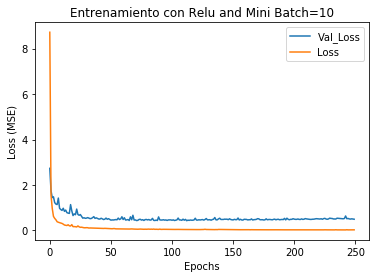

In [32]:
fig, im = plt.subplots()
im.plot(history.history['val_loss'])
im.plot(history.history['loss'])
im.set(xlabel='Epochs', ylabel='Loss (MSE)',title='Entrenamiento con Relu and Mini Batch=10')
im.legend(('Val_Loss', 'Loss' )) 

In [34]:
n_batches = 10
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))
model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.001),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s 286us/step - loss: 0.0184 - val_loss: 0.5190
Epoch 2/250
9745/9745 [==============================] - 3s 295us/step - loss: 0.0176 - val_loss: 0.4986
Epoch 3/250
9745/9745 [==============================] - 3s 324us/step - loss: 0.0174 - val_loss: 0.5138
Epoch 4/250
9745/9745 [==============================] - 3s 312us/step - loss: 0.0179 - val_loss: 0.5129
Epoch 5/250
9745/9745 [==============================] - 3s 342us/step - loss: 0.0175 - val_loss: 0.5209
Epoch 6/250
9745/9745 [==============================] - 3s 318us/step - loss: 0.0171 - val_loss: 0.5089
Epoch 7/250
9745/9745 [==============================] - 3s 349us/step - loss: 0.0181 - val_loss: 0.5062
Epoch 8/250
9745/9745 [==============================] - 4s 380us/step - loss: 0.0174 - val_loss: 0.5292
Epoch 9/250
9745/9745 [==============================] - 4s 399us/step - loss: 0.0176 - val_loss: 0.5009
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 2s 170us/step - loss: 0.0159 - val_loss: 0.5292
Epoch 79/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0152 - val_loss: 0.5230
Epoch 80/250
9745/9745 [==============================] - 2s 198us/step - loss: 0.0158 - val_loss: 0.5258
Epoch 81/250
9745/9745 [==============================] - 2s 169us/step - loss: 0.0155 - val_loss: 0.5383
Epoch 82/250
9745/9745 [==============================] - 2s 166us/step - loss: 0.0155 - val_loss: 0.5197
Epoch 83/250
9745/9745 [==============================] - 2s 166us/step - loss: 0.0154 - val_loss: 0.5266
Epoch 84/250
9745/9745 [==============================] - 2s 166us/step - loss: 0.0163 - val_loss: 0.5464
Epoch 85/250
9745/9745 [==============================] - 2s 168us/step - loss: 0.0157 - val_loss: 0.5211
Epoch 86/250
9745/9745 [==============================] - 2s 167us/step - loss: 0.0155 - val_loss: 0.5357
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 3s 271us/step - loss: 0.0146 - val_loss: 0.5292
Epoch 156/250
9745/9745 [==============================] - 3s 348us/step - loss: 0.0143 - val_loss: 0.5531
Epoch 157/250
9745/9745 [==============================] - 3s 343us/step - loss: 0.0145 - val_loss: 0.5396
Epoch 158/250
9745/9745 [==============================] - 3s 333us/step - loss: 0.0143 - val_loss: 0.5387
Epoch 159/250
9745/9745 [==============================] - 3s 344us/step - loss: 0.0146 - val_loss: 0.5508
Epoch 160/250
9745/9745 [==============================] - 3s 330us/step - loss: 0.0144 - val_loss: 0.5365
Epoch 161/250
9745/9745 [==============================] - 3s 320us/step - loss: 0.0143 - val_loss: 0.5390
Epoch 162/250
9745/9745 [==============================] - 3s 312us/step - loss: 0.0144 - val_loss: 0.5588
Epoch 163/250
9745/9745 [==============================] - 3s 323us/step - loss: 0.0141 - val_loss: 0.5309
Epoch 164/250
9745/9745 [============

Epoch 58/250
9745/9745 [==============================] - 3s 327us/step - loss: 0.0633 - val_loss: 0.3234
Epoch 59/250
9745/9745 [==============================] - 3s 327us/step - loss: 0.0682 - val_loss: 0.3253
Epoch 60/250
9745/9745 [==============================] - 3s 328us/step - loss: 0.0633 - val_loss: 0.3150
Epoch 61/250
9745/9745 [==============================] - 3s 332us/step - loss: 0.0650 - val_loss: 0.3256
Epoch 62/250
9745/9745 [==============================] - 3s 328us/step - loss: 0.0648 - val_loss: 0.3181
Epoch 63/250
9745/9745 [==============================] - 3s 325us/step - loss: 0.0609 - val_loss: 0.3197
Epoch 64/250
9745/9745 [==============================] - 3s 327us/step - loss: 0.0626 - val_loss: 0.3221
Epoch 65/250
9745/9745 [==============================] - 3s 330us/step - loss: 0.0759 - val_loss: 0.3346
Epoch 66/250
9745/9745 [==============================] - 3s 328us/step - loss: 0.0658 - val_loss: 0.3015
Epoch 67/250
9745/9745 [======================

Epoch 135/250
9745/9745 [==============================] - 3s 313us/step - loss: 0.0344 - val_loss: 0.2797
Epoch 136/250
9745/9745 [==============================] - 3s 312us/step - loss: 0.0329 - val_loss: 0.3088
Epoch 137/250
9745/9745 [==============================] - 3s 315us/step - loss: 0.0341 - val_loss: 0.2900
Epoch 138/250
9745/9745 [==============================] - 3s 312us/step - loss: 0.0323 - val_loss: 0.2866
Epoch 139/250
9745/9745 [==============================] - 3s 313us/step - loss: 0.0348 - val_loss: 0.2836
Epoch 140/250
9745/9745 [==============================] - 3s 312us/step - loss: 0.0341 - val_loss: 0.2800
Epoch 141/250
9745/9745 [==============================] - 3s 312us/step - loss: 0.0328 - val_loss: 0.3525
Epoch 142/250
9745/9745 [==============================] - 3s 315us/step - loss: 0.0360 - val_loss: 0.3250
Epoch 143/250
9745/9745 [==============================] - 3s 313us/step - loss: 0.0327 - val_loss: 0.2974
Epoch 144/250
9745/9745 [============

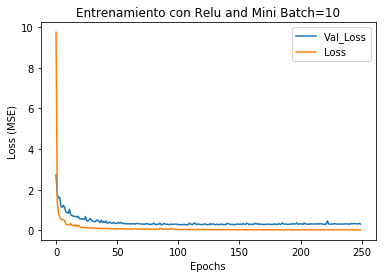

In [35]:
fig, im = plt.subplots()
im.plot(history.history['val_loss'])
im.plot(history.history['loss'])
im.set(xlabel='Epochs', ylabel='Loss (MSE)',title='Entrenamiento con Relu and Mini Batch=10')
im.legend(('Val_Loss', 'Loss' )) 

In [41]:


model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
moptimizer = Adagrad(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

history = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))



Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 7s 704us/step - loss: 8.9151 - val_loss: 3.3800
Epoch 2/250
9745/9745 [==============================] - 4s 379us/step - loss: 1.5959 - val_loss: 1.4206
Epoch 3/250
9745/9745 [==============================] - 4s 374us/step - loss: 0.8059 - val_loss: 0.8264
Epoch 4/250
9745/9745 [==============================] - 4s 382us/step - loss: 0.4917 - val_loss: 0.5069
Epoch 5/250
9745/9745 [==============================] - 4s 396us/step - loss: 0.3576 - val_loss: 0.3857
Epoch 6/250
9745/9745 [==============================] - 4s 395us/step - loss: 0.2846 - val_loss: 0.3162
Epoch 7/250
9745/9745 [==============================] - 4s 389us/step - loss: 0.2359 - val_loss: 0.2658
Epoch 8/250
9745/9745 [==============================] - 4s 387us/step - loss: 0.2016 - val_loss: 0.2344ETA - ETA: 0s  - ETA: 0s - loss: 0.20
Epoch 9/250
9745/9745 [==============================] - 4s 366us/step - lo

Epoch 154/250
9745/9745 [==============================] - 2s 239us/step - loss: 0.0267 - val_loss: 0.0617
Epoch 155/250
9745/9745 [==============================] - 3s 260us/step - loss: 0.0266 - val_loss: 0.0615
Epoch 156/250
9745/9745 [==============================] - 2s 249us/step - loss: 0.0265 - val_loss: 0.0608
Epoch 157/250
9745/9745 [==============================] - 2s 238us/step - loss: 0.0264 - val_loss: 0.0606
Epoch 158/250
9745/9745 [==============================] - 2s 248us/step - loss: 0.0263 - val_loss: 0.0608
Epoch 159/250
9745/9745 [==============================] - 2s 234us/step - loss: 0.0262 - val_loss: 0.0607
Epoch 160/250
9745/9745 [==============================] - 2s 232us/step - loss: 0.0261 - val_loss: 0.0603
Epoch 161/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.0260 - val_loss: 0.0601
Epoch 162/250
9745/9745 [==============================] - 2s 236us/step - loss: 0.0260 - val_loss: 0.0605
Epoch 163/250
9745/9745 [============

g) Entrene los modelos obtenidos en b) y c) utilizando estrategias modernas para adaptar la tasa de aprendizaje. Compare los desempeños de adagrad, adadelta, RMSprop y adam. ¿Se observa en algún caso un mejor resultado final? ¿Se observa en algún caso una mayor velocidad de convergencia sobre el dataset de entrenamiento? ¿Sobre el dataset de validación?

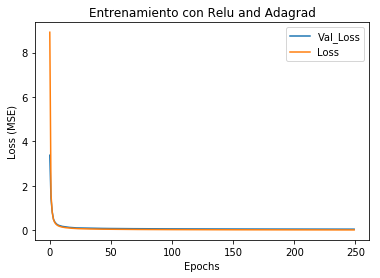

In [42]:
fig, im = plt.subplots()
im.plot(history.history['val_loss'])
im.plot(history.history['loss'])
im.set(xlabel='Epochs', ylabel='Loss (MSE)',title='Entrenamiento con Relu and Adagrad')
im.legend(('Val_Loss', 'Loss' )) 

In [43]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
moptimizer = Adadelta(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

history = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s 404us/step - loss: 125.7632 - val_loss: 134.9639
Epoch 2/250
9745/9745 [==============================] - 3s 299us/step - loss: 112.2877 - val_loss: 120.4968
Epoch 3/250
9745/9745 [==============================] - 2s 250us/step - loss: 99.4564 - val_loss: 106.3188
Epoch 4/250
9745/9745 [==============================] - 3s 262us/step - loss: 86.9450 - val_loss: 92.8456
Epoch 5/250
9745/9745 [==============================] - 2s 254us/step - loss: 74.9932 - val_loss: 80.1790
Epoch 6/250
9745/9745 [==============================] - 2s 240us/step - loss: 63.8525 - val_loss: 68.2374
Epoch 7/250
9745/9745 [==============================] - 2s 241us/step - loss: 53.6008 - val_loss: 57.2280
Epoch 8/250
9745/9745 [==============================] - 3s 263us/step - loss: 44.3202 - val_loss: 47.3013
Epoch 9/250
9745/9745 [==============================] - 3s 324us/step - loss: 36.0867 - va

9745/9745 [==============================] - 3s 326us/step - loss: 0.1397 - val_loss: 0.1402
Epoch 154/250
9745/9745 [==============================] - 3s 277us/step - loss: 0.1390 - val_loss: 0.1396
Epoch 155/250
9745/9745 [==============================] - 3s 290us/step - loss: 0.1382 - val_loss: 0.1390
Epoch 156/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.1374 - val_loss: 0.1387
Epoch 157/250
9745/9745 [==============================] - 2s 247us/step - loss: 0.1366 - val_loss: 0.1384
Epoch 158/250
9745/9745 [==============================] - 2s 253us/step - loss: 0.1360 - val_loss: 0.1380
Epoch 159/250
9745/9745 [==============================] - 2s 248us/step - loss: 0.1351 - val_loss: 0.1372
Epoch 160/250
9745/9745 [==============================] - 2s 252us/step - loss: 0.1345 - val_loss: 0.1364
Epoch 161/250
9745/9745 [==============================] - 3s 324us/step - loss: 0.1338 - val_loss: 0.1356
Epoch 162/250
9745/9745 [==========================

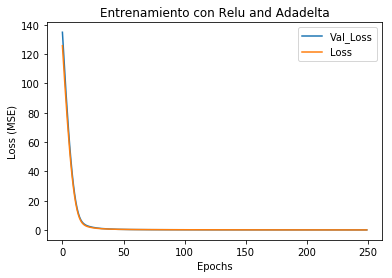

In [44]:
fig, im = plt.subplots()
im.plot(history.history['val_loss'])
im.plot(history.history['loss'])
im.set(xlabel='Epochs', ylabel='Loss (MSE)',title='Entrenamiento con Relu and Adadelta')
im.legend(('Val_Loss', 'Loss' )) 

In [45]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
moptimizer = RMSprop(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

history = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s 330us/step - loss: 3.2626 - val_loss: 0.9879
Epoch 2/250
9745/9745 [==============================] - 3s 266us/step - loss: 0.7712 - val_loss: 0.3843
Epoch 3/250
9745/9745 [==============================] - 3s 271us/step - loss: 0.6224 - val_loss: 0.4103
Epoch 4/250
9745/9745 [==============================] - 3s 270us/step - loss: 0.5638 - val_loss: 0.3372
Epoch 5/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.5506 - val_loss: 0.7248
Epoch 6/250
9745/9745 [==============================] - 3s 263us/step - loss: 0.4798 - val_loss: 0.2431
Epoch 7/250
9745/9745 [==============================] - 3s 264us/step - loss: 0.4673 - val_loss: 0.2959
Epoch 8/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.4581 - val_loss: 0.2777
Epoch 9/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.4385 - val_loss: 0.6839
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.2956 - val_loss: 0.2536
Epoch 79/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.2698 - val_loss: 0.1877
Epoch 80/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.2709 - val_loss: 0.2878
Epoch 81/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.2872 - val_loss: 0.2116
Epoch 82/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.2776 - val_loss: 0.3702
Epoch 83/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.2788 - val_loss: 0.1604
Epoch 84/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.2892 - val_loss: 0.2120
Epoch 85/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.2799 - val_loss: 0.1550
Epoch 86/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.2799 - val_loss: 0.5875
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 3s 261us/step - loss: 0.2373 - val_loss: 0.5218
Epoch 156/250
9745/9745 [==============================] - 2s 220us/step - loss: 0.2397 - val_loss: 0.1785
Epoch 157/250
9745/9745 [==============================] - 2s 212us/step - loss: 0.2470 - val_loss: 0.2222
Epoch 158/250
9745/9745 [==============================] - 2s 217us/step - loss: 0.2497 - val_loss: 0.1314
Epoch 159/250
9745/9745 [==============================] - 2s 187us/step - loss: 0.2450 - val_loss: 0.1299
Epoch 160/250
9745/9745 [==============================] - 2s 210us/step - loss: 0.2527 - val_loss: 0.1942
Epoch 161/250
9745/9745 [==============================] - 2s 211us/step - loss: 0.2556 - val_loss: 0.2103
Epoch 162/250
9745/9745 [==============================] - 2s 217us/step - loss: 0.2482 - val_loss: 0.1689
Epoch 163/250
9745/9745 [==============================] - 2s 235us/step - loss: 0.2498 - val_loss: 0.1393
Epoch 164/250
9745/9745 [============

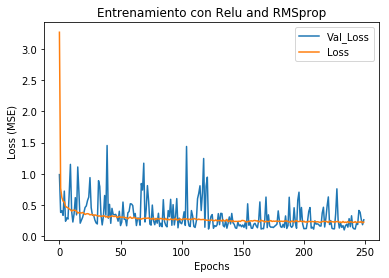

In [47]:
fig, im = plt.subplots()
im.plot(history.history['val_loss'])
im.plot(history.history['loss'])
im.set(xlabel='Epochs', ylabel='Loss (MSE)',title='Entrenamiento con Relu and RMSprop')
im.legend(('Val_Loss', 'Loss' )) 

In [48]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
moptimizer = Adam(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')
history = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s 302us/step - loss: 3.8499 - val_loss: 0.2792
Epoch 2/250
9745/9745 [==============================] - 2s 220us/step - loss: 0.2102 - val_loss: 0.2032
Epoch 3/250
9745/9745 [==============================] - 2s 224us/step - loss: 0.1835 - val_loss: 0.1787
Epoch 4/250
9745/9745 [==============================] - 2s 220us/step - loss: 0.1758 - val_loss: 0.1811
Epoch 5/250
9745/9745 [==============================] - 2s 227us/step - loss: 0.1476 - val_loss: 0.1516
Epoch 6/250
9745/9745 [==============================] - 2s 224us/step - loss: 0.1479 - val_loss: 0.1594
Epoch 7/250
9745/9745 [==============================] - 3s 257us/step - loss: 0.1525 - val_loss: 0.1665
Epoch 8/250
9745/9745 [==============================] - 3s 258us/step - loss: 0.1473 - val_loss: 0.2066
Epoch 9/250
9745/9745 [==============================] - 2s 252us/step - loss: 0.1546 - val_loss: 0.1711
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 3s 300us/step - loss: 0.1492 - val_loss: 0.1728
Epoch 79/250
9745/9745 [==============================] - 2s 237us/step - loss: 0.1463 - val_loss: 0.1545
Epoch 80/250
9745/9745 [==============================] - 2s 206us/step - loss: 0.1459 - val_loss: 0.1824
Epoch 81/250
9745/9745 [==============================] - 2s 226us/step - loss: 0.1448 - val_loss: 0.1513
Epoch 82/250
9745/9745 [==============================] - 2s 213us/step - loss: 0.1709 - val_loss: 0.1930
Epoch 83/250
9745/9745 [==============================] - 2s 210us/step - loss: 0.1615 - val_loss: 0.1520
Epoch 84/250
9745/9745 [==============================] - 2s 206us/step - loss: 0.1496 - val_loss: 0.1833
Epoch 85/250
9745/9745 [==============================] - 2s 247us/step - loss: 0.1409 - val_loss: 0.1517
Epoch 86/250
9745/9745 [==============================] - 2s 238us/step - loss: 0.1558 - val_loss: 0.1507
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 2s 212us/step - loss: 0.1612 - val_loss: 0.1682
Epoch 156/250
9745/9745 [==============================] - 2s 207us/step - loss: 0.1669 - val_loss: 0.1854
Epoch 157/250
9745/9745 [==============================] - 2s 249us/step - loss: 0.1538 - val_loss: 0.1803
Epoch 158/250
9745/9745 [==============================] - 2s 233us/step - loss: 0.1383 - val_loss: 0.1484
Epoch 159/250
9745/9745 [==============================] - 2s 215us/step - loss: 0.1494 - val_loss: 0.1660
Epoch 160/250
9745/9745 [==============================] - 2s 219us/step - loss: 0.1444 - val_loss: 0.1384
Epoch 161/250
9745/9745 [==============================] - 2s 214us/step - loss: 0.1397 - val_loss: 0.1559
Epoch 162/250
9745/9745 [==============================] - 2s 238us/step - loss: 0.1240 - val_loss: 0.1232
Epoch 163/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.1182 - val_loss: 0.2152
Epoch 164/250
9745/9745 [============

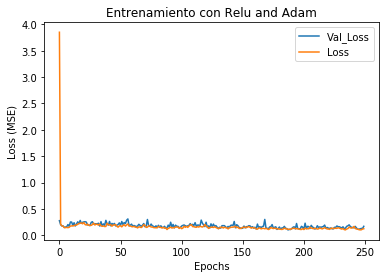

In [51]:
fig, im = plt.subplots()
im.plot(history.history['val_loss'])
im.plot(history.history['loss'])
im.set(xlabel='Epochs', ylabel='Loss (MSE)',title='Entrenamiento con Relu and Adam')
im.legend(('Val_Loss', 'Loss' )) 

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 225us/step - loss: 18.1601 - val_loss: 9.5480
Epoch 2/250
9745/9745 [==============================] - 2s 180us/step - loss: 5.1231 - val_loss: 5.7848
Epoch 3/250
9745/9745 [==============================] - 2s 197us/step - loss: 3.1306 - val_loss: 4.6532
Epoch 4/250
9745/9745 [==============================] - 2s 187us/step - loss: 2.3565 - val_loss: 3.7023
Epoch 5/250
9745/9745 [==============================] - 2s 176us/step - loss: 1.8822 - val_loss: 3.2866
Epoch 6/250
9745/9745 [==============================] - 2s 180us/step - loss: 1.5836 - val_loss: 3.0405
Epoch 7/250
9745/9745 [==============================] - 2s 204us/step - loss: 1.3663 - val_loss: 2.5880
Epoch 8/250
9745/9745 [==============================] - 2s 203us/step - loss: 1.1845 - val_loss: 2.4979
Epoch 9/250
9745/9745 [==============================] - 2s 194us/step - loss: 1.0717 - val_loss: 2.3786
Epoch 

Epoch 78/250
9745/9745 [==============================] - 2s 195us/step - loss: 0.2607 - val_loss: 1.0467
Epoch 79/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.2597 - val_loss: 1.0180
Epoch 80/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.2584 - val_loss: 1.0140
Epoch 81/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.2562 - val_loss: 1.0114
Epoch 82/250
9745/9745 [==============================] - 2s 175us/step - loss: 0.2540 - val_loss: 1.0008
Epoch 83/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.2523 - val_loss: 1.0130
Epoch 84/250
9745/9745 [==============================] - 2s 227us/step - loss: 0.2504 - val_loss: 0.9971
Epoch 85/250
9745/9745 [==============================] - 2s 232us/step - loss: 0.2486 - val_loss: 0.9909
Epoch 86/250
9745/9745 [==============================] - 2s 209us/step - loss: 0.2465 - val_loss: 1.0046
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 2s 161us/step - loss: 0.1646 - val_loss: 0.7821
Epoch 156/250
9745/9745 [==============================] - 2s 166us/step - loss: 0.1641 - val_loss: 0.7850
Epoch 157/250
9745/9745 [==============================] - 2s 161us/step - loss: 0.1631 - val_loss: 0.7793
Epoch 158/250
9745/9745 [==============================] - 2s 160us/step - loss: 0.1631 - val_loss: 0.7806
Epoch 159/250
9745/9745 [==============================] - 2s 162us/step - loss: 0.1618 - val_loss: 0.7712
Epoch 160/250
9745/9745 [==============================] - 2s 163us/step - loss: 0.1615 - val_loss: 0.7797
Epoch 161/250
9745/9745 [==============================] - 2s 161us/step - loss: 0.1608 - val_loss: 0.7687
Epoch 162/250
9745/9745 [==============================] - 2s 161us/step - loss: 0.1601 - val_loss: 0.7652
Epoch 163/250
9745/9745 [==============================] - 2s 164us/step - loss: 0.1593 - val_loss: 0.7726
Epoch 164/250
9745/9745 [============

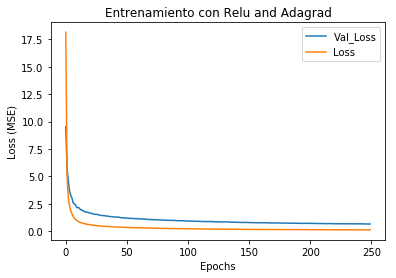

In [52]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
moptimizer = Adagrad(lr=0.001)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

history = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))
fig, im = plt.subplots()
im.plot(history.history['val_loss'])
im.plot(history.history['loss'])
im.set(xlabel='Epochs', ylabel='Loss (MSE)',title='Entrenamiento con Relu and Adagrad')
im.legend(('Val_Loss', 'Loss' )) 

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 252us/step - loss: 11.3394 - val_loss: 2.9798
Epoch 2/250
9745/9745 [==============================] - 2s 200us/step - loss: 1.2172 - val_loss: 1.9777
Epoch 3/250
9745/9745 [==============================] - 2s 202us/step - loss: 0.8435 - val_loss: 1.3647
Epoch 4/250
9745/9745 [==============================] - 2s 200us/step - loss: 0.5243 - val_loss: 1.5739
Epoch 5/250
9745/9745 [==============================] - 2s 199us/step - loss: 0.5142 - val_loss: 1.0598
Epoch 6/250
9745/9745 [==============================] - 2s 202us/step - loss: 0.2942 - val_loss: 0.9322
Epoch 7/250
9745/9745 [==============================] - 2s 200us/step - loss: 0.3921 - val_loss: 2.0044
Epoch 8/250
9745/9745 [==============================] - 2s 200us/step - loss: 0.4203 - val_loss: 1.3477
Epoch 9/250
9745/9745 [==============================] - 2s 210us/step - loss: 0.2480 - val_loss: 0.7763
Epoch 

Epoch 78/250
9745/9745 [==============================] - 2s 210us/step - loss: 0.0803 - val_loss: 0.6717
Epoch 79/250
9745/9745 [==============================] - 2s 208us/step - loss: 0.0935 - val_loss: 0.5581
Epoch 80/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.0740 - val_loss: 0.6943
Epoch 81/250
9745/9745 [==============================] - 2s 202us/step - loss: 0.0779 - val_loss: 0.6250
Epoch 82/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.0504 - val_loss: 0.6211
Epoch 83/250
9745/9745 [==============================] - 2s 207us/step - loss: 0.0494 - val_loss: 0.5824
Epoch 84/250
9745/9745 [==============================] - 2s 199us/step - loss: 0.0462 - val_loss: 0.6117
Epoch 85/250
9745/9745 [==============================] - 2s 200us/step - loss: 0.1127 - val_loss: 0.6239
Epoch 86/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.0641 - val_loss: 0.5662
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 2s 200us/step - loss: 0.0382 - val_loss: 0.6898
Epoch 156/250
9745/9745 [==============================] - 2s 199us/step - loss: 0.0418 - val_loss: 0.6961
Epoch 157/250
9745/9745 [==============================] - 2s 200us/step - loss: 0.0702 - val_loss: 0.9619
Epoch 158/250
9745/9745 [==============================] - 2s 199us/step - loss: 0.0793 - val_loss: 0.6781
Epoch 159/250
9745/9745 [==============================] - 2s 199us/step - loss: 0.0432 - val_loss: 0.6662
Epoch 160/250
9745/9745 [==============================] - 2s 199us/step - loss: 0.0566 - val_loss: 0.5800
Epoch 161/250
9745/9745 [==============================] - 2s 200us/step - loss: 0.0612 - val_loss: 0.6027
Epoch 162/250
9745/9745 [==============================] - 2s 199us/step - loss: 0.0340 - val_loss: 0.7865
Epoch 163/250
9745/9745 [==============================] - 2s 199us/step - loss: 0.0350 - val_loss: 0.6430
Epoch 164/250
9745/9745 [============

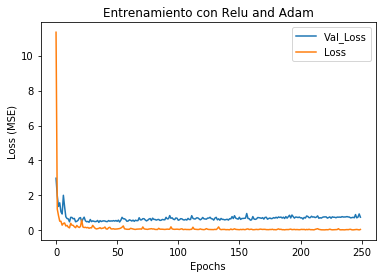

In [53]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
moptimizer = Adam(lr=0.001)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

history = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))
fig, im = plt.subplots()
im.plot(history.history['val_loss'])
im.plot(history.history['loss'])
im.set(xlabel='Epochs', ylabel='Loss (MSE)',title='Entrenamiento con Relu and Adam')
im.legend(('Val_Loss', 'Loss' )) 

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s 277us/step - loss: 130.0567 - val_loss: 142.2640
Epoch 2/250
9745/9745 [==============================] - 2s 224us/step - loss: 121.9955 - val_loss: 132.6670
Epoch 3/250
9745/9745 [==============================] - 2s 224us/step - loss: 114.2655 - val_loss: 123.5611
Epoch 4/250
9745/9745 [==============================] - 2s 226us/step - loss: 106.8309 - val_loss: 115.0601
Epoch 5/250
9745/9745 [==============================] - 2s 224us/step - loss: 99.7511 - val_loss: 107.1168
Epoch 6/250
9745/9745 [==============================] - 2s 223us/step - loss: 92.9813 - val_loss: 99.6626
Epoch 7/250
9745/9745 [==============================] - 2s 229us/step - loss: 86.4513 - val_loss: 92.6110
Epoch 8/250
9745/9745 [==============================] - 2s 224us/step - loss: 80.0689 - val_loss: 85.8689
Epoch 9/250
9745/9745 [==============================] - 2s 229us/step - loss: 73.7802 

Epoch 77/250
9745/9745 [==============================] - 2s 224us/step - loss: 6.4175 - val_loss: 8.9748
Epoch 78/250
9745/9745 [==============================] - 2s 224us/step - loss: 6.3380 - val_loss: 8.8761
Epoch 79/250
9745/9745 [==============================] - 2s 224us/step - loss: 6.2571 - val_loss: 8.7740
Epoch 80/250
9745/9745 [==============================] - 2s 223us/step - loss: 6.1690 - val_loss: 8.6730
Epoch 81/250
9745/9745 [==============================] - 2s 224us/step - loss: 6.0911 - val_loss: 8.5673
Epoch 82/250
9745/9745 [==============================] - 2s 224us/step - loss: 6.0030 - val_loss: 8.4740
Epoch 83/250
9745/9745 [==============================] - 2s 224us/step - loss: 5.9242 - val_loss: 8.3740
Epoch 84/250
9745/9745 [==============================] - 2s 224us/step - loss: 5.8442 - val_loss: 8.2739
Epoch 85/250
9745/9745 [==============================] - 2s 224us/step - loss: 5.7655 - val_loss: 8.1823
Epoch 86/250
9745/9745 [======================

Epoch 154/250
9745/9745 [==============================] - 2s 224us/step - loss: 2.7655 - val_loss: 4.5388
Epoch 155/250
9745/9745 [==============================] - 2s 223us/step - loss: 2.7400 - val_loss: 4.5161
Epoch 156/250
9745/9745 [==============================] - 2s 223us/step - loss: 2.7241 - val_loss: 4.4909
Epoch 157/250
9745/9745 [==============================] - 2s 223us/step - loss: 2.7013 - val_loss: 4.4743
Epoch 158/250
9745/9745 [==============================] - 2s 234us/step - loss: 2.6995 - val_loss: 4.4598
Epoch 159/250
9745/9745 [==============================] - 2s 236us/step - loss: 2.6718 - val_loss: 4.4341
Epoch 160/250
9745/9745 [==============================] - 2s 229us/step - loss: 2.6525 - val_loss: 4.4045
Epoch 161/250
9745/9745 [==============================] - 2s 226us/step - loss: 2.6364 - val_loss: 4.3825
Epoch 162/250
9745/9745 [==============================] - 2s 224us/step - loss: 2.6153 - val_loss: 4.3594
Epoch 163/250
9745/9745 [============

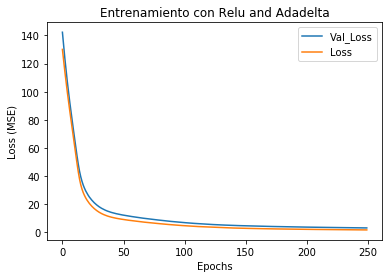

In [54]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
moptimizer = Adadelta(lr=0.001)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

history = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))
fig, im = plt.subplots()
im.plot(history.history['val_loss'])
im.plot(history.history['loss'])
im.set(xlabel='Epochs', ylabel='Loss (MSE)',title='Entrenamiento con Relu and Adadelta')
im.legend(('Val_Loss', 'Loss' )) 

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 224us/step - loss: 8.7542 - val_loss: 8.3734
Epoch 2/250
9745/9745 [==============================] - 2s 173us/step - loss: 2.5027 - val_loss: 3.9383
Epoch 3/250
9745/9745 [==============================] - 2s 173us/step - loss: 1.9350 - val_loss: 2.5119
Epoch 4/250
9745/9745 [==============================] - 2s 173us/step - loss: 1.6189 - val_loss: 2.6741
Epoch 5/250
9745/9745 [==============================] - 2s 175us/step - loss: 1.3321 - val_loss: 3.9061
Epoch 6/250
9745/9745 [==============================] - 2s 173us/step - loss: 1.0616 - val_loss: 2.1869
Epoch 7/250
9745/9745 [==============================] - 2s 173us/step - loss: 1.0527 - val_loss: 1.3533
Epoch 8/250
9745/9745 [==============================] - 2s 175us/step - loss: 0.8868 - val_loss: 1.3892
Epoch 9/250
9745/9745 [==============================] - 2s 175us/step - loss: 0.8769 - val_loss: 1.9765
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 2s 175us/step - loss: 0.2553 - val_loss: 1.4524
Epoch 79/250
9745/9745 [==============================] - 2s 173us/step - loss: 0.2585 - val_loss: 0.9060
Epoch 80/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.1969 - val_loss: 1.6204
Epoch 81/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.2228 - val_loss: 0.8934
Epoch 82/250
9745/9745 [==============================] - 2s 173us/step - loss: 0.1939 - val_loss: 0.7951
Epoch 83/250
9745/9745 [==============================] - 2s 173us/step - loss: 0.2027 - val_loss: 1.2752
Epoch 84/250
9745/9745 [==============================] - 2s 173us/step - loss: 0.2050 - val_loss: 0.9156
Epoch 85/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.2172 - val_loss: 1.0943
Epoch 86/250
9745/9745 [==============================] - 2s 175us/step - loss: 0.2247 - val_loss: 1.0071
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 2s 175us/step - loss: 0.1720 - val_loss: 1.0188
Epoch 156/250
9745/9745 [==============================] - 2s 173us/step - loss: 0.1607 - val_loss: 1.2343
Epoch 157/250
9745/9745 [==============================] - 2s 173us/step - loss: 0.1397 - val_loss: 1.4990
Epoch 158/250
9745/9745 [==============================] - 2s 173us/step - loss: 0.1289 - val_loss: 1.4268
Epoch 159/250
9745/9745 [==============================] - 2s 173us/step - loss: 0.1981 - val_loss: 1.3983
Epoch 160/250
9745/9745 [==============================] - 2s 173us/step - loss: 0.1637 - val_loss: 1.3849
Epoch 161/250
9745/9745 [==============================] - 2s 173us/step - loss: 0.1803 - val_loss: 1.2167
Epoch 162/250
9745/9745 [==============================] - 2s 173us/step - loss: 0.1217 - val_loss: 1.4726
Epoch 163/250
9745/9745 [==============================] - 2s 173us/step - loss: 0.1701 - val_loss: 1.4112
Epoch 164/250
9745/9745 [============

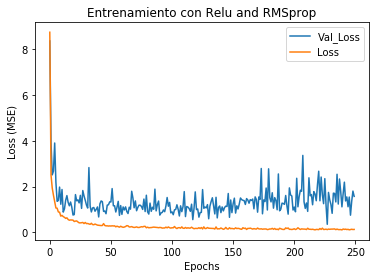

In [55]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
moptimizer = RMSprop(lr=0.001)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

history = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))
fig, im = plt.subplots()
im.plot(history.history['val_loss'])
im.plot(history.history['loss'])
im.set(xlabel='Epochs', ylabel='Loss (MSE)',title='Entrenamiento con Relu and RMSprop')
im.legend(('Val_Loss', 'Loss' )) 

h) Entrene los modelos obtenidos en b) y c) utilizando regularizadores $l_1$ y $l_2$ (*weight decay*). Compare los desempeños de prueba obtenidos antes y después de regularizar. Experimente con distintos valores del parámetro de regularización y comente. Además evalúe el efecto de regularizar solo la primera capa *vs* la segunda, comente.

In [17]:
#ESTE FUE NUESTRO MEJOR MODELO SIMOIDE
model = Sequential()
...#la regularization se debe incorporar a cada capa separadamente
moptimizer = Adadelta(lr=0.01)
idim=X_train_scaled.shape[1]
model.add(Dense(256,input_dim=idim,kernel_initializer='uniform',W_regularizer=regularizers.l2(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',W_regularizer=regularizers.l2(0.01)))
model.add(Activation('linear'))
model.compile(optimizer=moptimizer,loss='mean_squared_error')
history = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
  
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
  


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s 325us/step - loss: 128.6565 - val_loss: 137.8254
Epoch 2/250
9745/9745 [==============================] - 3s 262us/step - loss: 115.4532 - val_loss: 123.2377
Epoch 3/250
9745/9745 [==============================] - 3s 264us/step - loss: 102.8024 - val_loss: 109.6455
Epoch 4/250
9745/9745 [==============================] - 3s 268us/step - loss: 90.4809 - val_loss: 96.2608
Epoch 5/250
9745/9745 [==============================] - 3s 269us/step - loss: 78.6479 - val_loss: 83.6343
Epoch 6/250
9745/9745 [==============================] - 3s 265us/step - loss: 67.4833 - val_loss: 71.6930
Epoch 7/250
9745/9745 [==============================] - 3s 265us/step - loss: 57.1794 - val_loss: 60.6502
Epoch 8/250
9745/9745 [==============================] - 3s 276us/step - loss: 47.8716 - val_loss: 50.8557
Epoch 9/250
9745/9745 [==============================] - 3s 266us/step - loss: 39.5925 - v

Epoch 154/250
9745/9745 [==============================] - 3s 259us/step - loss: 0.5387 - val_loss: 0.5078
Epoch 155/250
9745/9745 [==============================] - 3s 259us/step - loss: 0.5377 - val_loss: 0.5048
Epoch 156/250
9745/9745 [==============================] - 3s 259us/step - loss: 0.5367 - val_loss: 0.5030
Epoch 157/250
9745/9745 [==============================] - 3s 258us/step - loss: 0.5356 - val_loss: 0.5034
Epoch 158/250
9745/9745 [==============================] - 3s 259us/step - loss: 0.5340 - val_loss: 0.5023
Epoch 159/250
9745/9745 [==============================] - 3s 258us/step - loss: 0.5331 - val_loss: 0.5001
Epoch 160/250
9745/9745 [==============================] - 3s 261us/step - loss: 0.5319 - val_loss: 0.4993
Epoch 161/250
9745/9745 [==============================] - 3s 259us/step - loss: 0.5307 - val_loss: 0.4987
Epoch 162/250
9745/9745 [==============================] - 3s 259us/step - loss: 0.5300 - val_loss: 0.4980
Epoch 163/250
9745/9745 [============

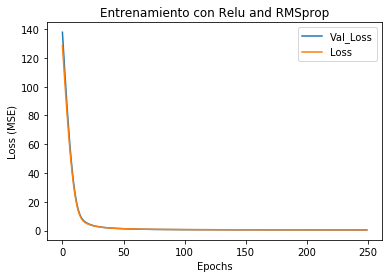

In [19]:
fig, im = plt.subplots()
im.plot(history.history['val_loss'])
im.plot(history.history['loss'])
im.set(xlabel='Epochs', ylabel='Loss (MSE)',title='Entrenamiento con Relu and RMSprop')
im.legend(('Val_Loss', 'Loss' )) 

In [20]:
model = Sequential()
...#la regularization se debe incorporar a cada capa separadamente
moptimizer = Adadelta(lr=0.01)
idim=X_train_scaled.shape[1]
model.add(Dense(256,input_dim=idim,kernel_initializer='uniform',W_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='uniform',W_regularizer=regularizers.l2(0.01)))
model.add(Activation('linear'))
model.compile(optimizer=moptimizer,loss='mean_squared_error')
history = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
  
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
  


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s 330us/step - loss: 104.2506 - val_loss: 85.8319
Epoch 2/250
9745/9745 [==============================] - 3s 321us/step - loss: 49.4471 - val_loss: 34.5167
Epoch 3/250
9745/9745 [==============================] - 3s 283us/step - loss: 20.1722 - val_loss: 20.0374
Epoch 4/250
9745/9745 [==============================] - 3s 283us/step - loss: 14.5905 - val_loss: 17.3198
Epoch 5/250
9745/9745 [==============================] - 3s 283us/step - loss: 13.0146 - val_loss: 15.8342
Epoch 6/250
9745/9745 [==============================] - 3s 282us/step - loss: 11.9563 - val_loss: 14.6388
Epoch 7/250
9745/9745 [==============================] - 3s 287us/step - loss: 11.0474 - val_loss: 13.6000
Epoch 8/250
9745/9745 [==============================] - 3s 280us/step - loss: 10.1983 - val_loss: 12.5981
Epoch 9/250
9745/9745 [==============================] - 3s 291us/step - loss: 9.4518 - val_los

Epoch 154/250
9745/9745 [==============================] - 3s 272us/step - loss: 1.8934 - val_loss: 2.8221
Epoch 155/250
9745/9745 [==============================] - 3s 262us/step - loss: 1.8852 - val_loss: 2.8277
Epoch 156/250
9745/9745 [==============================] - 3s 280us/step - loss: 1.8763 - val_loss: 2.7950
Epoch 157/250
9745/9745 [==============================] - 3s 269us/step - loss: 1.8654 - val_loss: 2.8206
Epoch 158/250
9745/9745 [==============================] - 3s 282us/step - loss: 1.8552 - val_loss: 2.7998
Epoch 159/250
9745/9745 [==============================] - 3s 275us/step - loss: 1.8463 - val_loss: 2.7821
Epoch 160/250
9745/9745 [==============================] - 3s 272us/step - loss: 1.8382 - val_loss: 2.7761
Epoch 161/250
9745/9745 [==============================] - 3s 288us/step - loss: 1.8271 - val_loss: 2.7573
Epoch 162/250
9745/9745 [==============================] - 3s 296us/step - loss: 1.8219 - val_loss: 2.7413
Epoch 163/250
9745/9745 [============

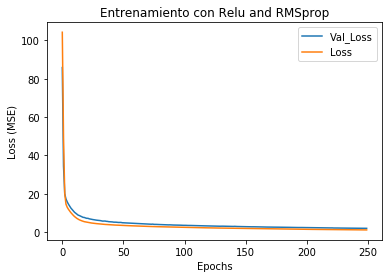

In [21]:
fig, im = plt.subplots()
im.plot(history.history['val_loss'])
im.plot(history.history['loss'])
im.set(xlabel='Epochs', ylabel='Loss (MSE)',title='Entrenamiento con Relu and RMSprop')
im.legend(('Val_Loss', 'Loss' ))

In [25]:
model = Sequential()
...#la regularization se debe incorporar a cada capa separadamente
moptimizer = Adadelta(lr=0.01)
idim=X_train_scaled.shape[1]
model.add(Dense(256,input_dim=idim,kernel_initializer='uniform',W_regularizer=regularizers.l2(0.05)))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',W_regularizer=regularizers.l2(0.05)))
model.add(Activation('linear'))
model.compile(optimizer=moptimizer,loss='mean_squared_error')
history = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
  
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
  


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s 366us/step - loss: 135.9281 - val_loss: 144.6806
Epoch 2/250
9745/9745 [==============================] - 3s 294us/step - loss: 122.9703 - val_loss: 130.6010
Epoch 3/250
9745/9745 [==============================] - 3s 293us/step - loss: 110.3914 - val_loss: 116.7616
Epoch 4/250
9745/9745 [==============================] - 3s 290us/step - loss: 98.0696 - val_loss: 103.3450
Epoch 5/250
9745/9745 [==============================] - 3s 298us/step - loss: 86.2056 - val_loss: 90.5922
Epoch 6/250
9745/9745 [==============================] - 3s 292us/step - loss: 74.9731 - val_loss: 78.7375
Epoch 7/250
9745/9745 [==============================] - 3s 292us/step - loss: 64.5441 - val_loss: 67.5327
Epoch 8/250
9745/9745 [==============================] - 3s 298us/step - loss: 54.9591 - val_loss: 57.3332
Epoch 9/250
9745/9745 [==============================] - 3s 291us/step - loss: 46.3486 - 

9745/9745 [==============================] - 3s 291us/step - loss: 0.8487 - val_loss: 0.7606
Epoch 154/250
9745/9745 [==============================] - 3s 279us/step - loss: 0.8477 - val_loss: 0.7625
Epoch 155/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.8478 - val_loss: 0.7648
Epoch 156/250
9745/9745 [==============================] - 3s 277us/step - loss: 0.8476 - val_loss: 0.7618
Epoch 157/250
9745/9745 [==============================] - 3s 277us/step - loss: 0.8471 - val_loss: 0.7636
Epoch 158/250
9745/9745 [==============================] - 3s 282us/step - loss: 0.8460 - val_loss: 0.7599
Epoch 159/250
9745/9745 [==============================] - 3s 273us/step - loss: 0.8466 - val_loss: 0.7624
Epoch 160/250
9745/9745 [==============================] - 3s 274us/step - loss: 0.8458 - val_loss: 0.7578
Epoch 161/250
9745/9745 [==============================] - 3s 293us/step - loss: 0.8454 - val_loss: 0.7626
Epoch 162/250
9745/9745 [==========================

In [ ]:
fig, im = plt.subplots()
im.plot(history.history['val_loss'])
im.plot(history.history['loss'])
im.set(xlabel='Epochs', ylabel='Loss (MSE)',title='Entrenamiento con Relu and RMSprop')
im.legend(('Val_Loss', 'Loss' ))

In [8]:
from keras import regularizers
model = Sequential()
...#la regularization se debe incorporar a cada capa separadamente
moptimizer = Adadelta(lr=0.01)
idim=X_train_scaled.shape[1]
model.add(Dense(256,input_dim=idim,kernel_initializer='uniform',W_regularizer=regularizers.l2(0.05)))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='uniform',W_regularizer=regularizers.l2(0.05)))
model.add(Activation('linear'))
model.compile(optimizer=moptimizer,loss='mean_squared_error')
history = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
  
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
  


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
4100/9745 [===========>..................] - ETA: 2s - loss: 130.4622

KeyboardInterrupt: 

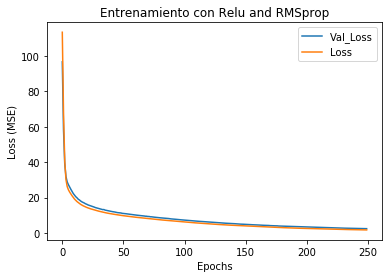

In [24]:
fig, im = plt.subplots()
im.plot(history.history['val_loss'])
im.plot(history.history['loss'])
im.set(xlabel='Epochs', ylabel='Loss (MSE)',title='Entrenamiento con Relu and RMSprop')
im.legend(('Val_Loss', 'Loss' ))

i) Entrene los modelos obtenidos en b) y c) utilizando *Dropout*. Compare los desempeños de prueba obtenidos antes y después de regularizar. Experimente con distintos valores del parámetro de regularización y comente.

In [10]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s 275us/step - loss: 1.5733 - val_loss: 0.9808
Epoch 2/250
9745/9745 [==============================] - 2s 240us/step - loss: 0.8161 - val_loss: 0.6666
Epoch 3/250
9745/9745 [==============================] - 2s 239us/step - loss: 0.7299 - val_loss: 0.5450
Epoch 4/250
9745/9745 [==============================] - 2s 247us/step - loss: 0.6865 - val_loss: 0.3872
Epoch 5/250
9745/9745 [==============================] - 2s 248us/step - loss: 0.6398 - val_loss: 0.3740
Epoch 6/250
9745/9745 [==============================] - 3s 274us/step - loss: 0.6065 - val_loss: 0.3554
Epoch 7/250
9745/9745 [==============================] - 3s 301us/step - loss: 0.5761 - val_loss: 0.3308
Epoch 8/250
9745/9745 [==============================] - 3s 304us/step - loss: 0.5594 - val_loss: 0.4153
Epoch 9/250
9745/9745 [==============================] - 3s 305us/step - loss: 0.5406 - val_loss: 0.3005
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 2s 254us/step - loss: 0.3223 - val_loss: 0.1710
Epoch 79/250
9745/9745 [==============================] - 2s 252us/step - loss: 0.3150 - val_loss: 0.2480
Epoch 80/250
9745/9745 [==============================] - 3s 296us/step - loss: 0.3125 - val_loss: 0.1692
Epoch 81/250
9745/9745 [==============================] - 3s 270us/step - loss: 0.3133 - val_loss: 0.2345
Epoch 82/250
9745/9745 [==============================] - 3s 301us/step - loss: 0.3202 - val_loss: 0.1775
Epoch 83/250
9745/9745 [==============================] - 3s 278us/step - loss: 0.3120 - val_loss: 0.1914
Epoch 84/250
9745/9745 [==============================] - 2s 249us/step - loss: 0.3114 - val_loss: 0.1734
Epoch 85/250
9745/9745 [==============================] - 2s 253us/step - loss: 0.3056 - val_loss: 0.1717
Epoch 86/250
9745/9745 [==============================] - 2s 233us/step - loss: 0.3064 - val_loss: 0.1627
Epoch 87/250
9745/9745 [======================

9745/9745 [==============================] - 3s 292us/step - loss: 0.2681 - val_loss: 0.1845
Epoch 155/250
9745/9745 [==============================] - 3s 292us/step - loss: 0.2654 - val_loss: 0.2700
Epoch 156/250
9745/9745 [==============================] - 3s 290us/step - loss: 0.2641 - val_loss: 0.2156
Epoch 157/250
9745/9745 [==============================] - 3s 293us/step - loss: 0.2636 - val_loss: 0.4114
Epoch 158/250
9745/9745 [==============================] - 3s 294us/step - loss: 0.2649 - val_loss: 0.2133
Epoch 159/250
9745/9745 [==============================] - 3s 280us/step - loss: 0.2703 - val_loss: 0.1459
Epoch 160/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.2660 - val_loss: 0.1908
Epoch 161/250
9745/9745 [==============================] - 3s 285us/step - loss: 0.2684 - val_loss: 0.1550
Epoch 162/250
9745/9745 [==============================] - 2s 256us/step - loss: 0.2616 - val_loss: 0.1925
Epoch 163/250
9745/9745 [==========================

9745/9745 [==============================] - 3s 264us/step - loss: 0.2452 - val_loss: 0.1392
Epoch 231/250
9745/9745 [==============================] - 3s 261us/step - loss: 0.2497 - val_loss: 0.1748
Epoch 232/250
9745/9745 [==============================] - 2s 235us/step - loss: 0.2467 - val_loss: 0.1513
Epoch 233/250
9745/9745 [==============================] - 2s 247us/step - loss: 0.2367 - val_loss: 0.1505
Epoch 234/250
9745/9745 [==============================] - 3s 307us/step - loss: 0.2479 - val_loss: 0.1361
Epoch 235/250
9745/9745 [==============================] - 2s 246us/step - loss: 0.2410 - val_loss: 0.1552
Epoch 236/250
9745/9745 [==============================] - 2s 238us/step - loss: 0.2469 - val_loss: 0.1563
Epoch 237/250
9745/9745 [==============================] - 2s 252us/step - loss: 0.2521 - val_loss: 0.1526
Epoch 238/250
9745/9745 [==============================] - 2s 246us/step - loss: 0.2452 - val_loss: 0.1501
Epoch 239/250
9745/9745 [==========================

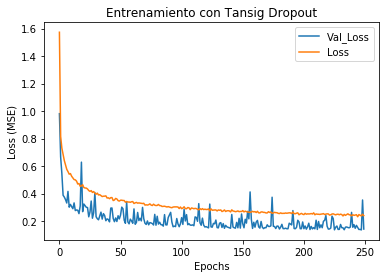

In [12]:
fig, im = plt.subplots()
im.plot(history.history['val_loss'])
im.plot(history.history['loss'])
im.set(xlabel='Epochs', ylabel='Loss (MSE)',title='Entrenamiento con Tansig Dropout')
im.legend(('Val_Loss', 'Loss' ))


In [13]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.001),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 247us/step - loss: 9.5699 - val_loss: 15.4160
Epoch 2/250
9745/9745 [==============================] - 2s 183us/step - loss: 3.1428 - val_loss: 3.3694
Epoch 3/250
9745/9745 [==============================] - 2s 185us/step - loss: 2.4393 - val_loss: 2.1796
Epoch 4/250
9745/9745 [==============================] - 2s 184us/step - loss: 2.0310 - val_loss: 1.3725
Epoch 5/250
9745/9745 [==============================] - 2s 183us/step - loss: 1.4316 - val_loss: 1.2231
Epoch 6/250
9745/9745 [==============================] - 2s 187us/step - loss: 1.1824 - val_loss: 1.0907
Epoch 7/250
9745/9745 [==============================] - 2s 185us/step - loss: 1.2491 - val_loss: 1.1067
Epoch 8/250
9745/9745 [==============================] - 2s 183us/step - loss: 1.1504 - val_loss: 1.5653
Epoch 9/250
9745/9745 [==============================] - 2s 183us/step - loss: 1.0713 - val_loss: 0.9244
Epoch 

9745/9745 [==============================] - 2s 204us/step - loss: 0.3985 - val_loss: 0.6833
Epoch 78/250
9745/9745 [==============================] - 2s 203us/step - loss: 0.4295 - val_loss: 0.5622
Epoch 79/250
9745/9745 [==============================] - 2s 232us/step - loss: 0.4305 - val_loss: 0.5119
Epoch 80/250
9745/9745 [==============================] - 2s 209us/step - loss: 0.4194 - val_loss: 0.5487
Epoch 81/250
9745/9745 [==============================] - 2s 242us/step - loss: 0.4428 - val_loss: 0.5832
Epoch 82/250
9745/9745 [==============================] - 2s 216us/step - loss: 0.4146 - val_loss: 0.5655
Epoch 83/250
9745/9745 [==============================] - 2s 205us/step - loss: 0.4082 - val_loss: 0.5954
Epoch 84/250
9745/9745 [==============================] - 2s 205us/step - loss: 0.4021 - val_loss: 0.6570
Epoch 85/250
9745/9745 [==============================] - 2s 203us/step - loss: 0.4015 - val_loss: 0.5767
Epoch 86/250
9745/9745 [==============================] - 2

Epoch 154/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.3138 - val_loss: 0.8508
Epoch 155/250
9745/9745 [==============================] - 2s 205us/step - loss: 0.3175 - val_loss: 0.7295
Epoch 156/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.3216 - val_loss: 0.9665
Epoch 157/250
9745/9745 [==============================] - 2s 203us/step - loss: 0.3053 - val_loss: 0.8171
Epoch 158/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.3134 - val_loss: 0.7644
Epoch 159/250
9745/9745 [==============================] - 2s 205us/step - loss: 0.3047 - val_loss: 0.7679
Epoch 160/250
9745/9745 [==============================] - 2s 205us/step - loss: 0.3134 - val_loss: 0.8169
Epoch 161/250
9745/9745 [==============================] - 2s 205us/step - loss: 0.2998 - val_loss: 0.8494
Epoch 162/250
9745/9745 [==============================] - 2s 206us/step - loss: 0.2946 - val_loss: 0.7552
Epoch 163/250
9745/9745 [============

9745/9745 [==============================] - 4s 420us/step - loss: 0.2467 - val_loss: 0.8850
Epoch 231/250
9745/9745 [==============================] - 4s 445us/step - loss: 0.2422 - val_loss: 0.9565
Epoch 232/250
9745/9745 [==============================] - 4s 451us/step - loss: 0.2469 - val_loss: 0.8508
Epoch 233/250
9745/9745 [==============================] - 5s 496us/step - loss: 0.2419 - val_loss: 0.8686
Epoch 234/250
9745/9745 [==============================] - 5s 463us/step - loss: 0.2482 - val_loss: 0.8899
Epoch 235/250
9745/9745 [==============================] - 5s 471us/step - loss: 0.2309 - val_loss: 0.9106
Epoch 236/250
9745/9745 [==============================] - 4s 445us/step - loss: 0.2558 - val_loss: 0.8710
Epoch 237/250
9745/9745 [==============================] - 5s 472us/step - loss: 0.2473 - val_loss: 0.9350
Epoch 238/250
9745/9745 [==============================] - 4s 430us/step - loss: 0.2504 - val_loss: 0.8930
Epoch 239/250
9745/9745 [==========================

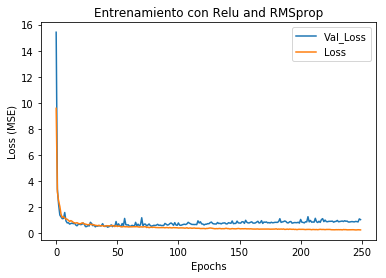

In [14]:
fig, im = plt.subplots()
im.plot(history.history['val_loss'])
im.plot(history.history['loss'])
im.set(xlabel='Epochs', ylabel='Loss (MSE)',title='Entrenamiento con Relu and RMSprop')
im.legend(('Val_Loss', 'Loss' ))

j) Fijando todos los demás hiper-parámetros del modelo definido en b) y en c), utilice validación cruzada con un número de *folds* igual a *K* = 5 y *K*=10 para determinar el mejor valor correspondiente a un parámetro que usted elija (tasa de aprendizaje, número de neuronas, parámetro de regularización, etc) ¿El mejor parámetro para la red con sigmoidal es distinto que para ReLU? ¿Porqué sucede? Además mida el error real del modelo sobre el conjunto de pruebas, compare y concluya.

In [ ]:
from sklearn import cross_validation
Xm = X_train_scaled.values
ym = y_train
kfold = cross_validation.KFold(len(Xm), 10)
cvscores = []
for i, (train, val) in enumerate(kfold):
    ...# create model
    model = #model with hiperparam
    ...# Compile model
    model.compile(optimizer=,loss='mean_squared_error')
    ...# Fit the model
    model.fit(Xm[train], ym[train], epochs=250)
    ...# evaluate the model
    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
mse_cv = np.mean(cvscores)